In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import datetime as dt

matplotlib.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False 
pd.options.display.float_format = '{:.2f}'.format
# from tqdm import tqdm
plt.rcParams["figure.figsize"] = (10,10)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=17) 

from pandas.api.types import is_numeric_dtype, is_integer_dtype, is_float_dtype, is_bool_dtype
from pandas.api.types import is_object_dtype, is_string_dtype, is_categorical_dtype, is_datetime64_dtype

In [250]:
scale = pd.read_csv('SCALE불량.csv', engine = 'python', encoding = 'CP949')
scale.head()
new_scale = pd.read_csv('total_scale.csv', encoding = 'utf-8')

In [3]:
scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    int64  
 7   PT_LTH             720 non-null    int64  
 8   PT_WGT             720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    int64  
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

##### 잘못된 변수 유형 변경 및 목표변수 값 변경

In [251]:
scale.drop('PLATE_NO', axis =1, inplace =True)
scale.drop('ROLLING_DATE', axis =1, inplace =True)
scale['SCALE'] =scale['SCALE'].apply(lambda x : 1 if x =='불량' else 0)
scale['HSB'] = scale['HSB'].apply(lambda x : 1 if x == '적용' else 0)
scale['FUR_NO_ROW'] = scale['FUR_NO_ROW'].astype('object')
scale['ROLLING_DESCALING'] =scale['ROLLING_DESCALING'].astype('object') 

In [5]:
scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              720 non-null    int64  
 1   SPEC               720 non-null    object 
 2   STEEL_KIND         720 non-null    object 
 3   PT_THK             720 non-null    float64
 4   PT_WDTH            720 non-null    int64  
 5   PT_LTH             720 non-null    int64  
 6   PT_WGT             720 non-null    int64  
 7   FUR_NO             720 non-null    object 
 8   FUR_NO_ROW         720 non-null    object 
 9   FUR_HZ_TEMP        720 non-null    int64  
 10  FUR_HZ_TIME        720 non-null    int64  
 11  FUR_SZ_TEMP        720 non-null    int64  
 12  FUR_SZ_TIME        720 non-null    int64  
 13  FUR_TIME           720 non-null    int64  
 14  FUR_EXTEMP         720 non-null    int64  
 15  ROLLING_TEMP_T5    720 non-null    int64  
 16  HSB                720 non

### PLATE_NO, ROLLING_DATE 변수는 자재번호와 압연시행 날짜를 말하는 변수이다. 
### 압연시행 날짜는 이전 EDA에서  2008년 8월 1일~2일의 짧은 시계열을 가진 변수로 통계적으로 검증할 Sample의 수가 적기 때문에 제거한다.

## 1. 변수명 확인  

### 순서대로 후판 제조번호, 압연일자, 불량유무, 제품규격, 강종, 두께, 폭, 길이, 중량  

### 가열로호기, 가열로 작업순번, 가열대 온도, 가열대시간, 균열대온도, 균열대시간, 가열로 시간
### 가열대 추출온도, 압연온도, HSB적용여부, 디스케일링 횟수, 작업조 

#### 1-1 관련변수 그룹
#### 생산지시 관련 변수 : 두께, 폭, 길이, 중량  
#### 제품 종류 관련 변수 : 강종, 제품규격
#### 가열로 관련 변수 : 가열로 호기, 가열로 작업 순번 ,추출온도 
#### 가열로 가열대 관련 변수 : 가열대 온도, 가열대 시간
#### 가열로 균열대 관련 변수 : 균열대 온도. 균열대 시간
#### 압연공정 관련 변수 : 압연온도, HSB적용여부, Descaling count
#### 작업자 관련 변수 : 작업조

## 2 EDA 

In [4]:
## 불량
pro = scale[scale['SCALE']== 1]
## 양품
no = scale[scale['SCALE']== 0]
print('불량 갯수 {}'.format(len(pro)))
display(pro.head())
print('양품 갯수 {}'.format(len(no)))
display(no.head())


불량 갯수 0


Empty DataFrame
Columns: [PLATE_NO, ROLLING_DATE, SCALE, SPEC, STEEL_KIND, PT_THK, PT_WDTH, PT_LTH, PT_WGT, FUR_NO, FUR_NO_ROW, FUR_HZ_TEMP, FUR_HZ_TIME, FUR_SZ_TEMP, FUR_SZ_TIME, FUR_TIME, FUR_EXTEMP, ROLLING_TEMP_T5, HSB, ROLLING_DESCALING, WORK_GR]
Index: []

[0 rows x 21 columns]

양품 갯수 0


Empty DataFrame
Columns: [PLATE_NO, ROLLING_DATE, SCALE, SPEC, STEEL_KIND, PT_THK, PT_WDTH, PT_LTH, PT_WGT, FUR_NO, FUR_NO_ROW, FUR_HZ_TEMP, FUR_HZ_TIME, FUR_SZ_TEMP, FUR_SZ_TIME, FUR_TIME, FUR_EXTEMP, ROLLING_TEMP_T5, HSB, ROLLING_DESCALING, WORK_GR]
Index: []

[0 rows x 21 columns]

In [5]:
# 전체적인 불량율 계산을 위한 피보팅
pv_table = scale.groupby('SCALE').size().to_frame(name ='count').reset_index()
pv_table
di_pv = pv_table.pivot_table(index ='SCALE', aggfunc ='sum',margins = True)
di_pv
di_pv['ratio'] = di_pv['count'][1] /di_pv['count']['All']
display(di_pv)

count  ratio
SCALE              
불량       231   0.68
양품       489   0.68
All      720   0.68

In [6]:
new_scale.drop('강판번호', axis =1, inplace =True)
new_scale.drop('작업날짜', axis =1, inplace =True)
new_scale.drop('작업날', axis =1, inplace =True)
new_scale.drop('작업시간', axis =1, inplace =True)
new_scale

SCALE        제품규격  강종    두께     폭     길이     중량   호기  작업순번  가열대온도  가열대시간  \
0        0  AB/EH32-TM  T1 32.25  3707  15109  14180  1호기     1   1144    116   
1        0  AB/EH32-TM  T1 32.25  3707  15109  14180  1호기     2   1144    122   
2        0   NV-E36-TM  T8 33.27  3619  19181  18130  2호기     1   1129    116   
3        0   NV-E36-TM  T8 33.27  3619  19181  18130  2호기     2   1152    125   
4        0  BV-EH36-TM  T8 38.33  3098  13334  12430  3호기     1   1140    134   
..     ...         ...  ..   ...   ...    ...    ...  ...   ...    ...    ...   
715      0      NV-A32  C0 18.11  3260  40586  37620  1호기     1   1174     66   
716      1       NK-KA  C0 20.14  3580  38639  21870  3호기     1   1172     72   
717      0      NV-A32  C0 16.60  3441  43688  19590  2호기     2   1169     65   
718      0        LR-A  C0 18.92  3401  41455  20940  1호기     2   1142     55   
719      0      GL-A32  C0 16.09  3400  54209  69840  3호기     1   1186     82   

     균열대온도  균열대시간  가열로시간  추출온도  압연온도 HSB적용여부  Descaling횟수 WORK_GR  
0     1133     59    282  1133   934      적용            8      2조  
1     1135     53    283  1135   937      적용            8      2조  
2     1121     55    282  1121   889      적용            8      3조  
3     1127     68    316  1127   885      적용            8      3조  
4     1128     48    314  1128   873      적용            8      1조  
..     ...    ...    ...   ...   ...     ...          ...     ...  
715   1160     71    240  1160   965      적용           10      3조  
716   1164     62    245  1164  1005      적용            8      2조  
717   1163     77    247  1163   948      적용           10      4조  
718   1151     86    246  1151   948      적용           10      4조  
719   1169     45    239  1169   957      적용           10      2조  

[720 rows x 19 columns]

In [7]:
new_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SCALE        720 non-null    int64  
 1   제품규격         720 non-null    object 
 2   강종           720 non-null    object 
 3   두께           720 non-null    float64
 4   폭            720 non-null    int64  
 5   길이           720 non-null    int64  
 6   중량           720 non-null    int64  
 7   호기           720 non-null    object 
 8   작업순번         720 non-null    int64  
 9   가열대온도        720 non-null    int64  
 10  가열대시간        720 non-null    int64  
 11  균열대온도        720 non-null    int64  
 12  균열대시간        720 non-null    int64  
 13  가열로시간        720 non-null    int64  
 14  추출온도         720 non-null    int64  
 15  압연온도         720 non-null    int64  
 16  HSB적용여부      720 non-null    object 
 17  Descaling횟수  720 non-null    int64  
 18  WORK_GR      720 non-null    object 
dtypes: float

### 전체적인 불량율 32 %

In [13]:
def draw_col1(df, steel_kind):
    if steel_kind!= 'All':
        df = df[df['강종']==steel_kind]
    
    numeric_cols = df.select_dtypes(exclude = 'object')
    
    col_sum =len(numeric_cols.columns)
    
    nrows1= (col_sum // 4) + 1
    n = 0
    m = 0
    
    fig, ax = plt.subplots(nrows1 , 4 , figsize = ( 15,15))
    fig.subplots_adjust(top=0.95)
    fig.suptitle('강종 : {} 의 연속변수 확인 '.format(steel_kind))
    for i in numeric_cols.columns:
        pro = numeric_cols[numeric_cols['SCALE']==1]
        no = numeric_cols[numeric_cols['SCALE']==0]
        
#         print(n,m)
        sns.histplot(no[i]  , color = 'blue',label = '양품',ax= ax[n,m])
        sns.histplot(pro[i] , color = 'red',label ='불량' ,ax= ax[n,m])
        ax[n,m].set_xlabel(i)
        ax[n,m].legend(loc ='upper right')
        
        m+=1 
        if m == 4:
            m = 0
            n +=1
        elif n == nrows1:
            break
#     fig.tight_layout() 

In [14]:
    def draw_ot_col(df, col, steel_kind):
        df= df[df['STEEL_KIND'] == steel_kind]
        object_cols = df.select_dtypes('object')
        n1= 0
        m1 = 0
        plt.figure(figsize =(8,5))
        plt.title('강종 : {}'.format(steel_kind))
        sns.countplot(x = col,hue="SCALE", data=df)
        plt.xticks(rotation = 90)
        plt.show()
                

In [15]:
def two_T_test(df, steel_kind):
    df =df[df['강종']== steel_kind]

#### 2 - 강종 별 불량율 확인  --- : 전체 평균 불량율 32.4 %

In [16]:
for i in new_scale.강종.unique():
    sk = new_scale[new_scale['강종']==i ]
    sk1 = sk.SCALE.value_counts().to_frame(name = 'count').T
    if len(sk1.columns) !=2:
        sk1['ratio'] = 'nan'
        print('---강종 : {}--- 제품 수 : {}'.format(i, len(sk)))
        display('불량율 측정불가')
        print()
    else:
        print('---강종 : {}--- 제품 수 : {}'.format(i, len(sk)))
        sk1['ratio'] = (sk1[1]/  (sk1[0]+sk1[1])) * 100
        display('불량율 :', round(sk1['ratio']['count'],3))
        print()
        
    

---강종 : T1--- 제품 수 : 18


'불량율 :'

11.111


---강종 : T8--- 제품 수 : 95


'불량율 :'

5.263


---강종 : T0--- 제품 수 : 16


'불량율 :'

12.5


---강종 : T5--- 제품 수 : 43


'불량율 :'

4.651


---강종 : C0--- 제품 수 : 503


'불량율 :'

42.147


---강종 : C3--- 제품 수 : 7


'불량율 :'

14.286


---강종 : C1--- 제품 수 : 1


'불량율 측정불가'


---강종 : T7--- 제품 수 : 35


'불량율 :'

17.143


---강종 : T3--- 제품 수 : 2


'불량율 측정불가'

#### 2- 강종별 불량율 확인 결과 
#### C0의 불량율이 42.147%로 평균 불량율 32.4% 보다 월등히 높은 것을 확인 할 수 있음
#### 따라서 불량의 상당 수는 C0 강종에서 발생하는 것을 알 수 있다.

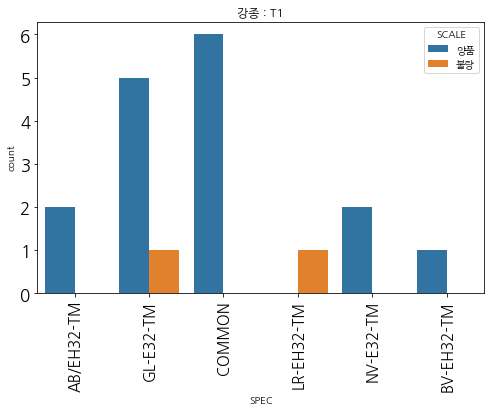

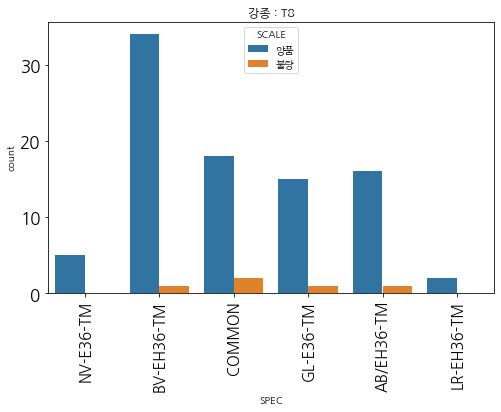

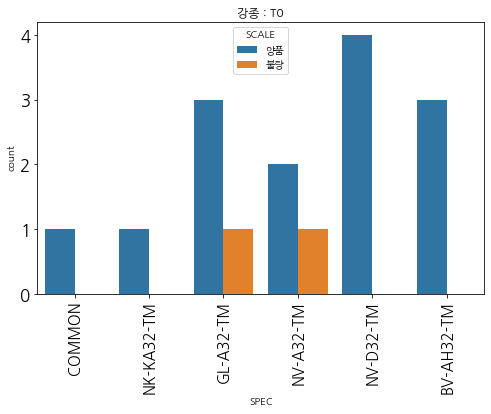

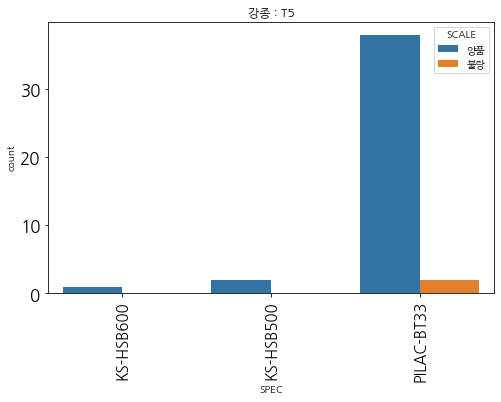

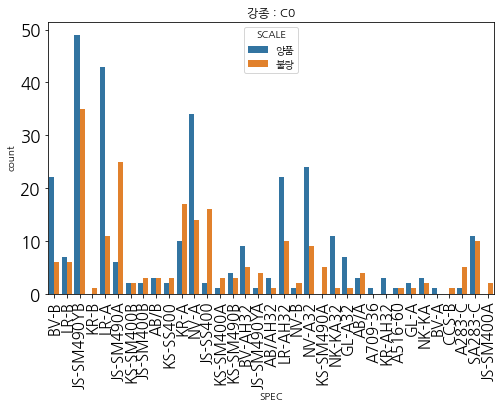

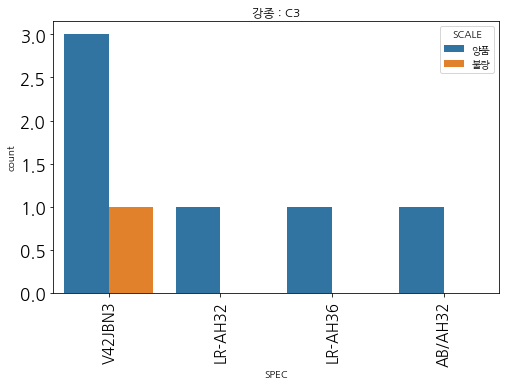

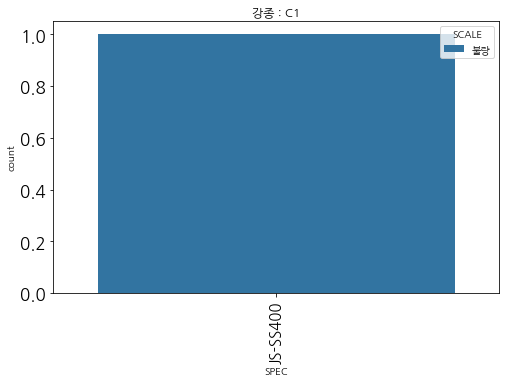

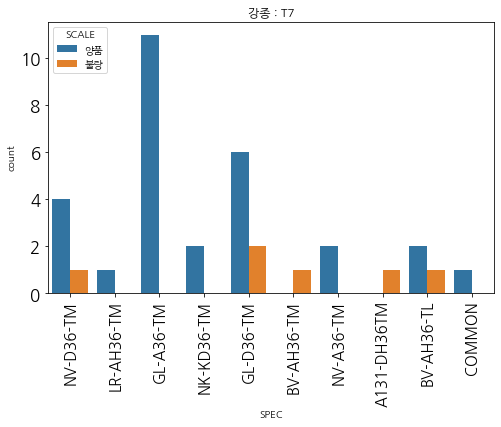

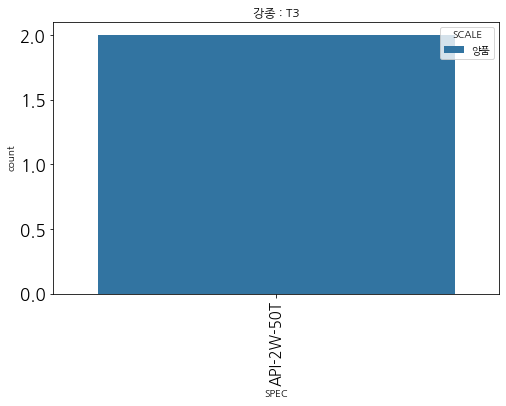

In [12]:
for i in scale['STEEL_KIND'].unique():
    draw_ot_col(scale,'SPEC', i)

#### 강종별로 특정 제품규격에서 불량이 많이 발생하는 것을 알 수있다.

#### 원인분석시 불량판정으로 유효한 변수로 사용할 수 있을 것 같음.

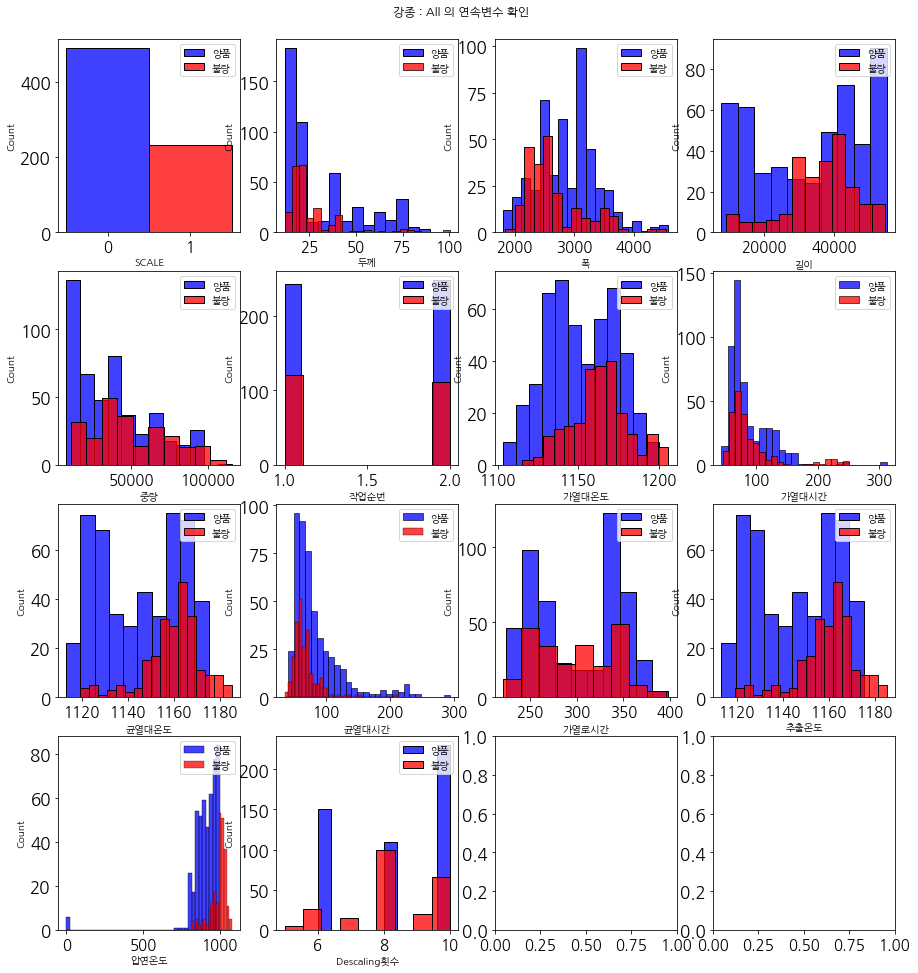

In [17]:
draw_col1(new_scale, 'All')

### 2-1 그룹화 x 전체 연속변수 분포 확인 
#### ------------------------------------------------------------------------------------------------------------------  
PT_TICK  두께 : 지시 두께가 클 수록 불량이 적게 발생하는 경향을 보임

PT_WIDH  폭 : 2000~ 3000mm에서 불량이 많이 발생하는 경향을 보인다.

PT_LETH  플레이트 길이 : 플레이트 길이가 길수록 불량이 많이 발생하는 경향을 보임.

PT_WHIGHT 플레이트 중량 : 중량이 커질수록 불량 %가 증가하는 경향을 보임  

#### ------------------------------------------------------------------------------------------------------------------  

FUR_ROW_NUM : 가열로 작업순서 - 그래프상으로는 불량의 비율이 비슷해보임.

가열로 가열대 온도 : 1160~1180도 구간에서 불량율이 높은 것을 확인 할 수 있다.

가열로 가열대 시간 : 이상치 처럼 보이는 값들이 존재하긴 하지만, 80~100초 사이에서 불량갯수가 확튀는 것을 확인 할 수 있다.

가열로 균열대 온도 : 온도가 증가하면서  불량갯수가 증가하다가 1170도 이후에는 100% 불량을 보인다. 

가열로 균열대 시간 : 시간이 짧은 쪽에서 불량이 발생한다.

가열대 추출온도 : 이 변수는 가열대 균열대 온도와 100% 동일하다. 

-- 가열로 관련 변수들은 가열대, 균열대 둘다 연속공정으로 관련이 있을 확률이 높다.
-- 이 변수들 중 SCALE 불량과 관련된 직관적인 변수를 분석을 통해 추릴 필요가 있다.
#### ----------------------------------------------------------------------------------------------------------------
위의 강종별 불량갯수를 확인 해본 결과 특정 강종에서 특정 제품규격에 불량이 집중되어 있는 것을 확인 할 수 있다.

따라서 강종별로 다시찍어보아야 변수별로 불량과 양품의 차이를 육안으로 명확하게 확인할 수 있을 듯하다 

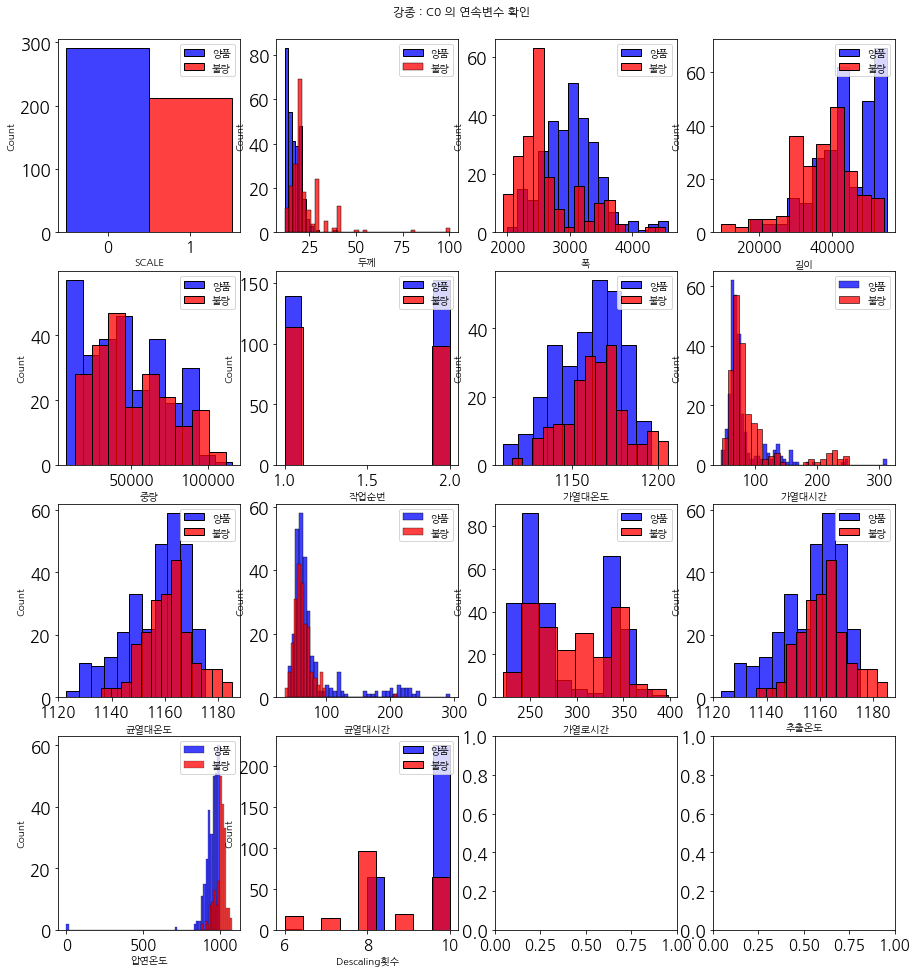

In [18]:
draw_col1(new_scale, 'C0')

C0 강종의 경우 압연온도, 디스케일링 횟수, 추출온도 가열대온도, 균열대 온도변수가 특정 값 이상에서 100% 불량을 보인다.

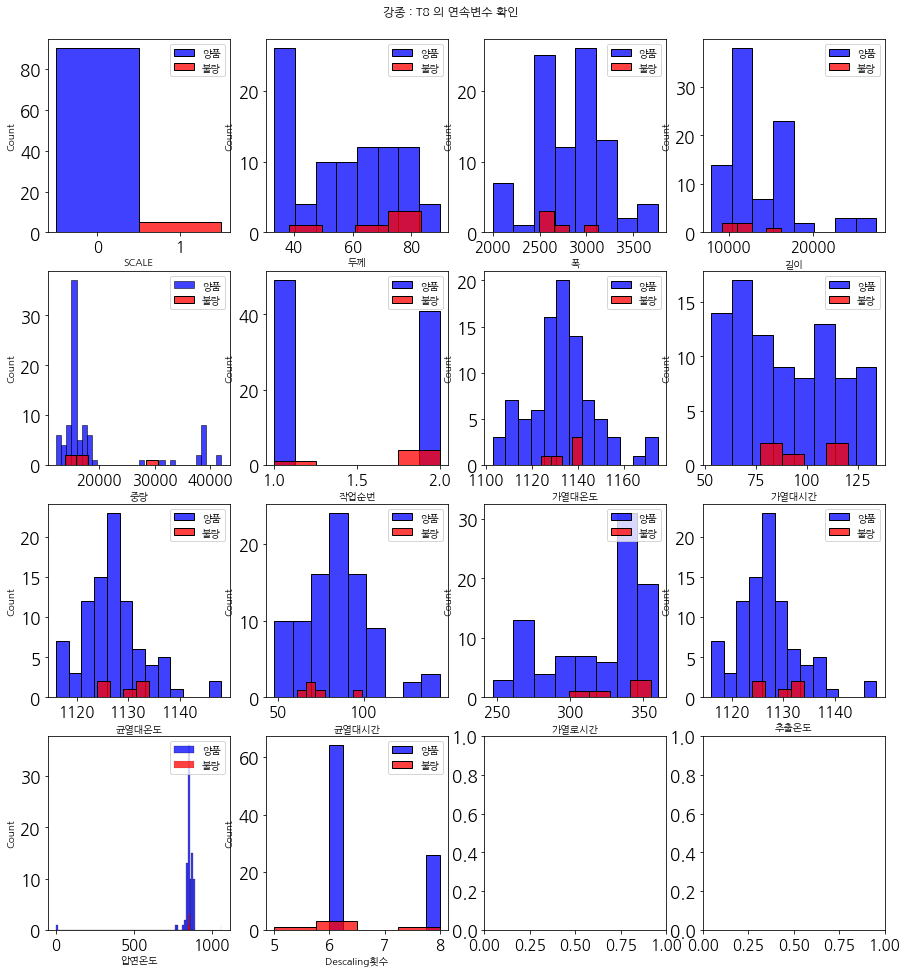

In [19]:
draw_col1(new_scale, 'T8')

T8 강종의 경우 불량의 갯수가 통계적으로 의미가 없을 만큼 수가 적어 명확한 판단이 불가능하다

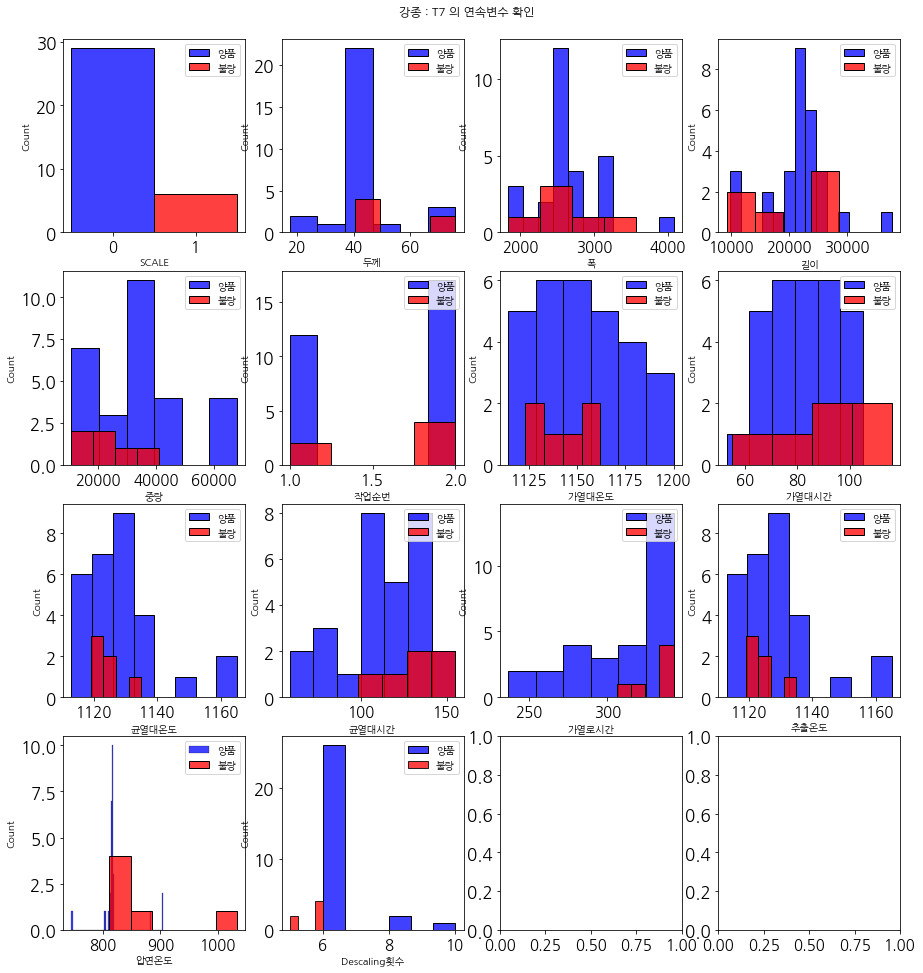

In [20]:
draw_col1(new_scale, 'T7')

T7 강종의 경우 압연온도,  균열대시간, 가열대시간 디스케일링 횟수가 핵심 변수로 보이고, C0강종과 달리 불량에 압연온도를 제외한 다른 온도변수는 크게 영향을 미치는 것 같아 보이진 않는다.  

다만 불량의 수가 적기 때문에 명확한 판단이 어려울 듯하다.

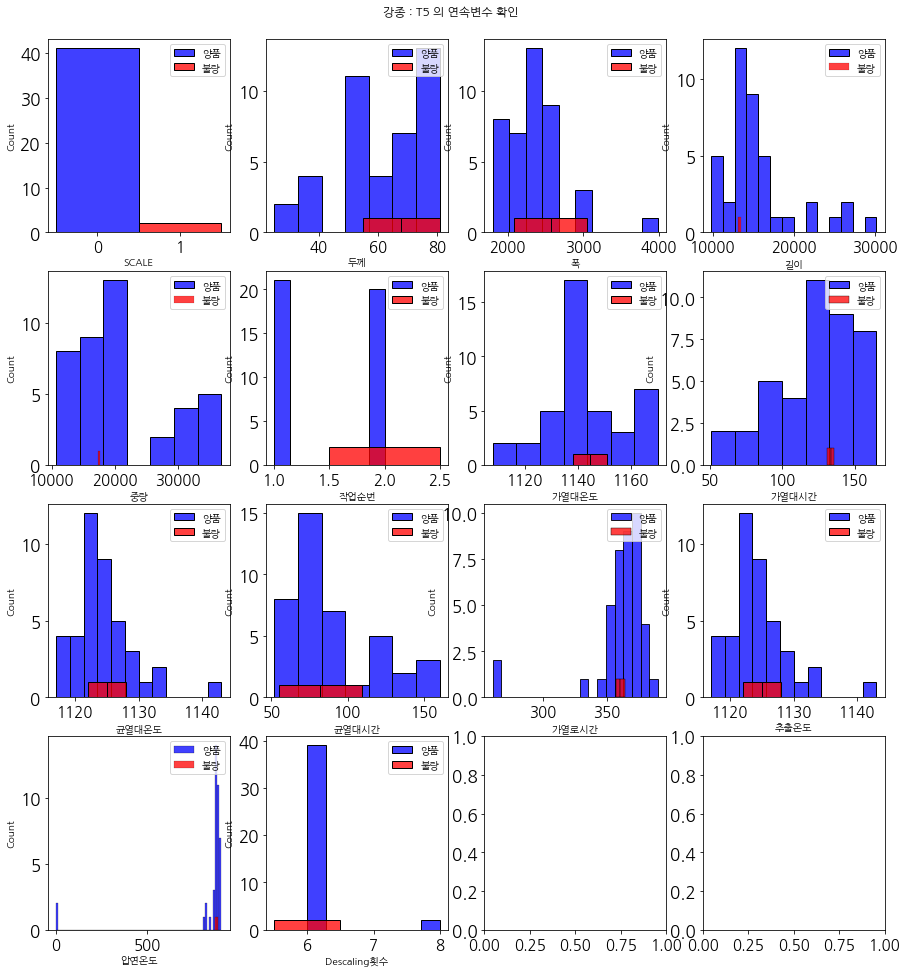

In [21]:
draw_col1(new_scale, 'T5')

T5 강종의 경우 불량의 갯수가 통계적으로 의미가 없을 만큼 수가 적어 명확한 판단이 불가능하다

## 2-2 통계적 검증
### 1. 상관계수를 통한 연관 변수 파악
### 2. 양품과 불량품의 연속형 변수 평균값을 2 Sample T - test를 통해 유의한지 검증하겠다.
### 3. 범주형 변수별 불량률을 Chi Square- Test를 통해 유의한지 검증하겠다. 

##### 1. 상관계수를 통한 연관 변수파악

In [22]:
def check_corr(df):
    steel_kind = df['강종'].unique()
    def sk(df, i):
        sk = df[df['강종']== i]
        if len(sk) <10:
            print('데이터 부족')
        else:
            
            print('강종 :  {}  - 변수별 상관계수 '.format(i))
            display(sk.corr())
            print('-------------------------------------------------------------------------------------')
            print()
    

    for i in  steel_kind:
        sk(df, i)
    

In [23]:
check_corr(new_scale)

강종 :  T1  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00 -0.19 -0.03  0.33  0.43 -0.35   0.38   0.07   0.39  -0.23   
두께           -0.19  1.00 -0.43 -0.84 -0.51  0.16  -0.73   0.34  -0.78   0.47   
폭            -0.03 -0.43  1.00 -0.05 -0.12  0.04   0.45   0.20   0.31  -0.72   
길이            0.33 -0.84 -0.05  1.00  0.83 -0.18   0.59  -0.35   0.73  -0.26   
중량            0.43 -0.51 -0.12  0.83  1.00 -0.08   0.47  -0.09   0.58  -0.30   
작업순번         -0.35  0.16  0.04 -0.18 -0.08  1.00   0.11  -0.07   0.05   0.07   
가열대온도         0.38 -0.73  0.45  0.59  0.47  0.11   1.00  -0.24   0.96  -0.36   
가열대시간         0.07  0.34  0.20 -0.35 -0.09 -0.07  -0.24   1.00  -0.34  -0.45   
균열대온도         0.39 -0.78  0.31  0.73  0.58  0.05   0.96  -0.34   1.00  -0.34   
균열대시간        -0.23  0.47 -0.72 -0.26 -0.30  0.07  -0.36  -0.45  -0.34   1.00   
가열로시간        -0.28  0.85 -0.60 -0.70 -0.59  0.05  -0.74   0.18  -0.74   0.65   
추출온도          0.39 -0.78  0.31  0.73  0.58  0.05   0.96  -0.34   1.00  -0.34   
압연온도         -0.41  0.81  0.01 -0.97 -0.86  0.15  -0.69   0.35  -0.81   0.27   
Descaling횟수   0.10 -0.98  0.49  0.81  0.51 -0.11   0.71  -0.27   0.74  -0.52   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE        -0.28  0.39 -0.41         0.10  
두께            0.85 -0.78  0.81        -0.98  
폭            -0.60  0.31  0.01         0.49  
길이           -0.70  0.73 -0.97         0.81  
중량           -0.59  0.58 -0.86         0.51  
작업순번          0.05  0.05  0.15        -0.11  
가열대온도        -0.74  0.96 -0.69         0.71  
가열대시간         0.18 -0.34  0.35        -0.27  
균열대온도        -0.74  1.00 -0.81         0.74  
균열대시간         0.65 -0.34  0.27        -0.52  
가열로시간         1.00 -0.74  0.70        -0.89  
추출온도         -0.74  1.00 -0.81         0.74  
압연온도          0.70 -0.81  1.00        -0.77  
Descaling횟수  -0.89  0.74 -0.77         1.00

-------------------------------------------------------------------------------------

강종 :  T8  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00  0.14 -0.09 -0.10 -0.01  0.15   0.05   0.07   0.09  -0.11   
두께            0.14  1.00 -0.45 -0.69 -0.03  0.03  -0.27   0.07  -0.11   0.19   
폭            -0.09 -0.45  1.00 -0.16 -0.21  0.03   0.33   0.03   0.23  -0.11   
길이           -0.10 -0.69 -0.16  1.00  0.50 -0.05  -0.03  -0.04  -0.11  -0.18   
중량           -0.01 -0.03 -0.21  0.50  1.00 -0.04  -0.25   0.08  -0.20  -0.10   
작업순번          0.15  0.03  0.03 -0.05 -0.04  1.00   0.06   0.06   0.07  -0.09   
가열대온도         0.05 -0.27  0.33 -0.03 -0.25  0.06   1.00   0.06   0.79  -0.33   
가열대시간         0.07  0.07  0.03 -0.04  0.08  0.06   0.06   1.00   0.07  -0.69   
균열대온도         0.09 -0.11  0.23 -0.11 -0.20  0.07   0.79   0.07   1.00  -0.29   
균열대시간        -0.11  0.19 -0.11 -0.18 -0.10 -0.09  -0.33  -0.69  -0.29   1.00   
가열로시간         0.08  0.59 -0.32 -0.37  0.14  0.10  -0.39   0.23  -0.17   0.22   
추출온도          0.09 -0.11  0.23 -0.11 -0.20  0.07   0.79   0.07   1.00  -0.29   
압연온도          0.11 -0.15 -0.11  0.13 -0.21 -0.09   0.11  -0.00   0.03  -0.02   
Descaling횟수  -0.09 -0.78  0.50  0.43 -0.24 -0.03   0.41  -0.03   0.18  -0.21   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE         0.08  0.09  0.11        -0.09  
두께            0.59 -0.11 -0.15        -0.78  
폭            -0.32  0.23 -0.11         0.50  
길이           -0.37 -0.11  0.13         0.43  
중량            0.14 -0.20 -0.21        -0.24  
작업순번          0.10  0.07 -0.09        -0.03  
가열대온도        -0.39  0.79  0.11         0.41  
가열대시간         0.23  0.07 -0.00        -0.03  
균열대온도        -0.17  1.00  0.03         0.18  
균열대시간         0.22 -0.29 -0.02        -0.21  
가열로시간         1.00 -0.17 -0.18        -0.82  
추출온도         -0.17  1.00  0.03         0.18  
압연온도         -0.18  0.03  1.00         0.24  
Descaling횟수  -0.82  0.18  0.24         1.00

-------------------------------------------------------------------------------------

강종 :  T0  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00 -0.27  0.28  0.17  0.01  0.15   0.38  -0.30   0.46  -0.26   
두께           -0.27  1.00 -0.22 -0.84  0.00 -0.10  -0.13   0.57  -0.54   0.72   
폭             0.28 -0.22  1.00 -0.28 -0.07 -0.14   0.18  -0.40   0.30  -0.13   
길이            0.17 -0.84 -0.28  1.00  0.12  0.25   0.02  -0.43   0.36  -0.57   
중량            0.01  0.00 -0.07  0.12  1.00 -0.05   0.16  -0.13   0.18   0.04   
작업순번          0.15 -0.10 -0.14  0.25 -0.05  1.00  -0.01   0.05  -0.15   0.15   
가열대온도         0.38 -0.13  0.18  0.02  0.16 -0.01   1.00  -0.40   0.81  -0.02   
가열대시간        -0.30  0.57 -0.40 -0.43 -0.13  0.05  -0.40   1.00  -0.56   0.37   
균열대온도         0.46 -0.54  0.30  0.36  0.18 -0.15   0.81  -0.56   1.00  -0.52   
균열대시간        -0.26  0.72 -0.13 -0.57  0.04  0.15  -0.02   0.37  -0.52   1.00   
가열로시간        -0.40  0.78 -0.29 -0.64 -0.12 -0.05  -0.55   0.81  -0.83   0.64   
추출온도          0.46 -0.54  0.30  0.36  0.18 -0.15   0.81  -0.56   1.00  -0.52   
압연온도          0.07 -0.14  0.11  0.13 -0.06  0.20   0.30  -0.18   0.26   0.12   
Descaling횟수   0.03 -0.92  0.24  0.73 -0.29  0.05   0.03  -0.52   0.43  -0.66   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE        -0.40  0.46  0.07         0.03  
두께            0.78 -0.54 -0.14        -0.92  
폭            -0.29  0.30  0.11         0.24  
길이           -0.64  0.36  0.13         0.73  
중량           -0.12  0.18 -0.06        -0.29  
작업순번         -0.05 -0.15  0.20         0.05  
가열대온도        -0.55  0.81  0.30         0.03  
가열대시간         0.81 -0.56 -0.18        -0.52  
균열대온도        -0.83  1.00  0.26         0.43  
균열대시간         0.64 -0.52  0.12        -0.66  
가열로시간         1.00 -0.83 -0.39        -0.69  
추출온도         -0.83  1.00  0.26         0.43  
압연온도         -0.39  0.26  1.00         0.18  
Descaling횟수  -0.69  0.43  0.18         1.00

-------------------------------------------------------------------------------------

강종 :  T5  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00  0.10  0.13 -0.11 -0.11  0.22   0.02   0.08   0.02  -0.06   
두께            0.10  1.00 -0.15 -0.59 -0.42 -0.02  -0.55   0.34  -0.38  -0.54   
폭             0.13 -0.15  1.00 -0.39  0.05 -0.21  -0.17   0.10  -0.08   0.14   
길이           -0.11 -0.59 -0.39  1.00  0.66  0.10   0.23  -0.41   0.48   0.11   
중량           -0.11 -0.42  0.05  0.66  1.00  0.11   0.05  -0.27   0.14   0.28   
작업순번          0.22 -0.02 -0.21  0.10  0.11  1.00   0.26   0.02   0.17   0.23   
가열대온도         0.02 -0.55 -0.17  0.23  0.05  0.26   1.00  -0.05   0.23   0.62   
가열대시간         0.08  0.34  0.10 -0.41 -0.27  0.02  -0.05   1.00  -0.23  -0.21   
균열대온도         0.02 -0.38 -0.08  0.48  0.14  0.17   0.23  -0.23   1.00  -0.22   
균열대시간        -0.06 -0.54  0.14  0.11  0.28  0.23   0.62  -0.21  -0.22   1.00   
가열로시간        -0.00  0.71  0.21 -0.73 -0.29 -0.01  -0.30   0.55  -0.61  -0.06   
추출온도          0.02 -0.38 -0.08  0.48  0.14  0.17   0.23  -0.23   1.00  -0.22   
압연온도          0.05 -0.28  0.12  0.10  0.11  0.02   0.23   0.32   0.03   0.28   
Descaling횟수  -0.05 -0.52 -0.25  0.63  0.16 -0.01   0.10  -0.56   0.66  -0.15   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE        -0.00  0.02  0.05        -0.05  
두께            0.71 -0.38 -0.28        -0.52  
폭             0.21 -0.08  0.12        -0.25  
길이           -0.73  0.48  0.10         0.63  
중량           -0.29  0.14  0.11         0.16  
작업순번         -0.01  0.17  0.02        -0.01  
가열대온도        -0.30  0.23  0.23         0.10  
가열대시간         0.55 -0.23  0.32        -0.56  
균열대온도        -0.61  1.00  0.03         0.66  
균열대시간        -0.06 -0.22  0.28        -0.15  
가열로시간         1.00 -0.61 -0.04        -0.91  
추출온도         -0.61  1.00  0.03         0.66  
압연온도         -0.04  0.03  1.00        -0.02  
Descaling횟수  -0.91  0.66 -0.02         1.00

-------------------------------------------------------------------------------------

강종 :  C0  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00  0.41 -0.37 -0.35  0.09 -0.06   0.11   0.11   0.21  -0.22   
두께            0.41  1.00 -0.28 -0.67  0.03 -0.01  -0.19   0.05  -0.08  -0.16   
폭            -0.37 -0.28  1.00 -0.02 -0.06  0.02   0.10  -0.09   0.10   0.12   
길이           -0.35 -0.67 -0.02  1.00  0.09 -0.04   0.12   0.08  -0.06   0.20   
중량            0.09  0.03 -0.06  0.09  1.00 -0.03  -0.16   0.10  -0.05  -0.13   
작업순번         -0.06 -0.01  0.02 -0.04 -0.03  1.00  -0.04  -0.02  -0.01   0.05   
가열대온도         0.11 -0.19  0.10  0.12 -0.16 -0.04   1.00  -0.09   0.79  -0.19   
가열대시간         0.11  0.05 -0.09  0.08  0.10 -0.02  -0.09   1.00  -0.18   0.24   
균열대온도         0.21 -0.08  0.10 -0.06 -0.05 -0.01   0.79  -0.18   1.00  -0.52   
균열대시간        -0.22 -0.16  0.12  0.20 -0.13  0.05  -0.19   0.24  -0.52   1.00   
가열로시간         0.09  0.00 -0.36  0.19  0.18  0.02  -0.18   0.45  -0.31   0.44   
추출온도          0.21 -0.08  0.10 -0.06 -0.05 -0.01   0.79  -0.18   1.00  -0.52   
압연온도          0.39  0.38 -0.27 -0.33  0.08 -0.02  -0.03   0.10   0.07  -0.21   
Descaling횟수  -0.46 -0.71  0.27  0.58 -0.19  0.04   0.18  -0.03   0.05   0.17   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE         0.09  0.21  0.39        -0.46  
두께            0.00 -0.08  0.38        -0.71  
폭            -0.36  0.10 -0.27         0.27  
길이            0.19 -0.06 -0.33         0.58  
중량            0.18 -0.05  0.08        -0.19  
작업순번          0.02 -0.01 -0.02         0.04  
가열대온도        -0.18  0.79 -0.03         0.18  
가열대시간         0.45 -0.18  0.10        -0.03  
균열대온도        -0.31  1.00  0.07         0.05  
균열대시간         0.44 -0.52 -0.21         0.17  
가열로시간         1.00 -0.31  0.05        -0.01  
추출온도         -0.31  1.00  0.07         0.05  
압연온도          0.05  0.07  1.00        -0.40  
Descaling횟수  -0.01  0.05 -0.40         1.00

-------------------------------------------------------------------------------------

데이터 부족
데이터 부족
강종 :  T7  - 변수별 상관계수 


SCALE    두께     폭    길이    중량  작업순번  가열대온도  가열대시간  균열대온도  균열대시간  \
SCALE         1.00  0.23  0.01 -0.16 -0.24  0.06  -0.15   0.16  -0.15   0.26   
두께            0.23  1.00 -0.50 -0.81 -0.39 -0.06  -0.60   0.02  -0.23   0.71   
폭             0.01 -0.50  1.00  0.14  0.16  0.15   0.34   0.05   0.17  -0.45   
길이           -0.16 -0.81  0.14  1.00  0.48 -0.09   0.58   0.01   0.22  -0.56   
중량           -0.24 -0.39  0.16  0.48  1.00 -0.20   0.35  -0.04   0.01  -0.24   
작업순번          0.06 -0.06  0.15 -0.09 -0.20  1.00   0.10  -0.26   0.20  -0.13   
가열대온도        -0.15 -0.60  0.34  0.58  0.35  0.10   1.00  -0.04   0.64  -0.65   
가열대시간         0.16  0.02  0.05  0.01 -0.04 -0.26  -0.04   1.00  -0.49   0.10   
균열대온도        -0.15 -0.23  0.17  0.22  0.01  0.20   0.64  -0.49   1.00  -0.62   
균열대시간         0.26  0.71 -0.45 -0.56 -0.24 -0.13  -0.65   0.10  -0.62   1.00   
가열로시간         0.24  0.56 -0.32 -0.52 -0.33 -0.19  -0.63   0.54  -0.70   0.79   
추출온도         -0.15 -0.23  0.17  0.22  0.01  0.20   0.64  -0.49   1.00  -0.62   
압연온도          0.32 -0.22  0.23  0.30 -0.12  0.03   0.29   0.06   0.35  -0.45   
Descaling횟수  -0.27 -0.40  0.23  0.40  0.07  0.17   0.51  -0.49   0.73  -0.61   

             가열로시간  추출온도  압연온도  Descaling횟수  
SCALE         0.24 -0.15  0.32        -0.27  
두께            0.56 -0.23 -0.22        -0.40  
폭            -0.32  0.17  0.23         0.23  
길이           -0.52  0.22  0.30         0.40  
중량           -0.33  0.01 -0.12         0.07  
작업순번         -0.19  0.20  0.03         0.17  
가열대온도        -0.63  0.64  0.29         0.51  
가열대시간         0.54 -0.49  0.06        -0.49  
균열대온도        -0.70  1.00  0.35         0.73  
균열대시간         0.79 -0.62 -0.45        -0.61  
가열로시간         1.00 -0.70 -0.33        -0.66  
추출온도         -0.70  1.00  0.35         0.73  
압연온도         -0.33  0.35  1.00         0.45  
Descaling횟수  -0.66  0.73  0.45         1.00

-------------------------------------------------------------------------------------

데이터 부족


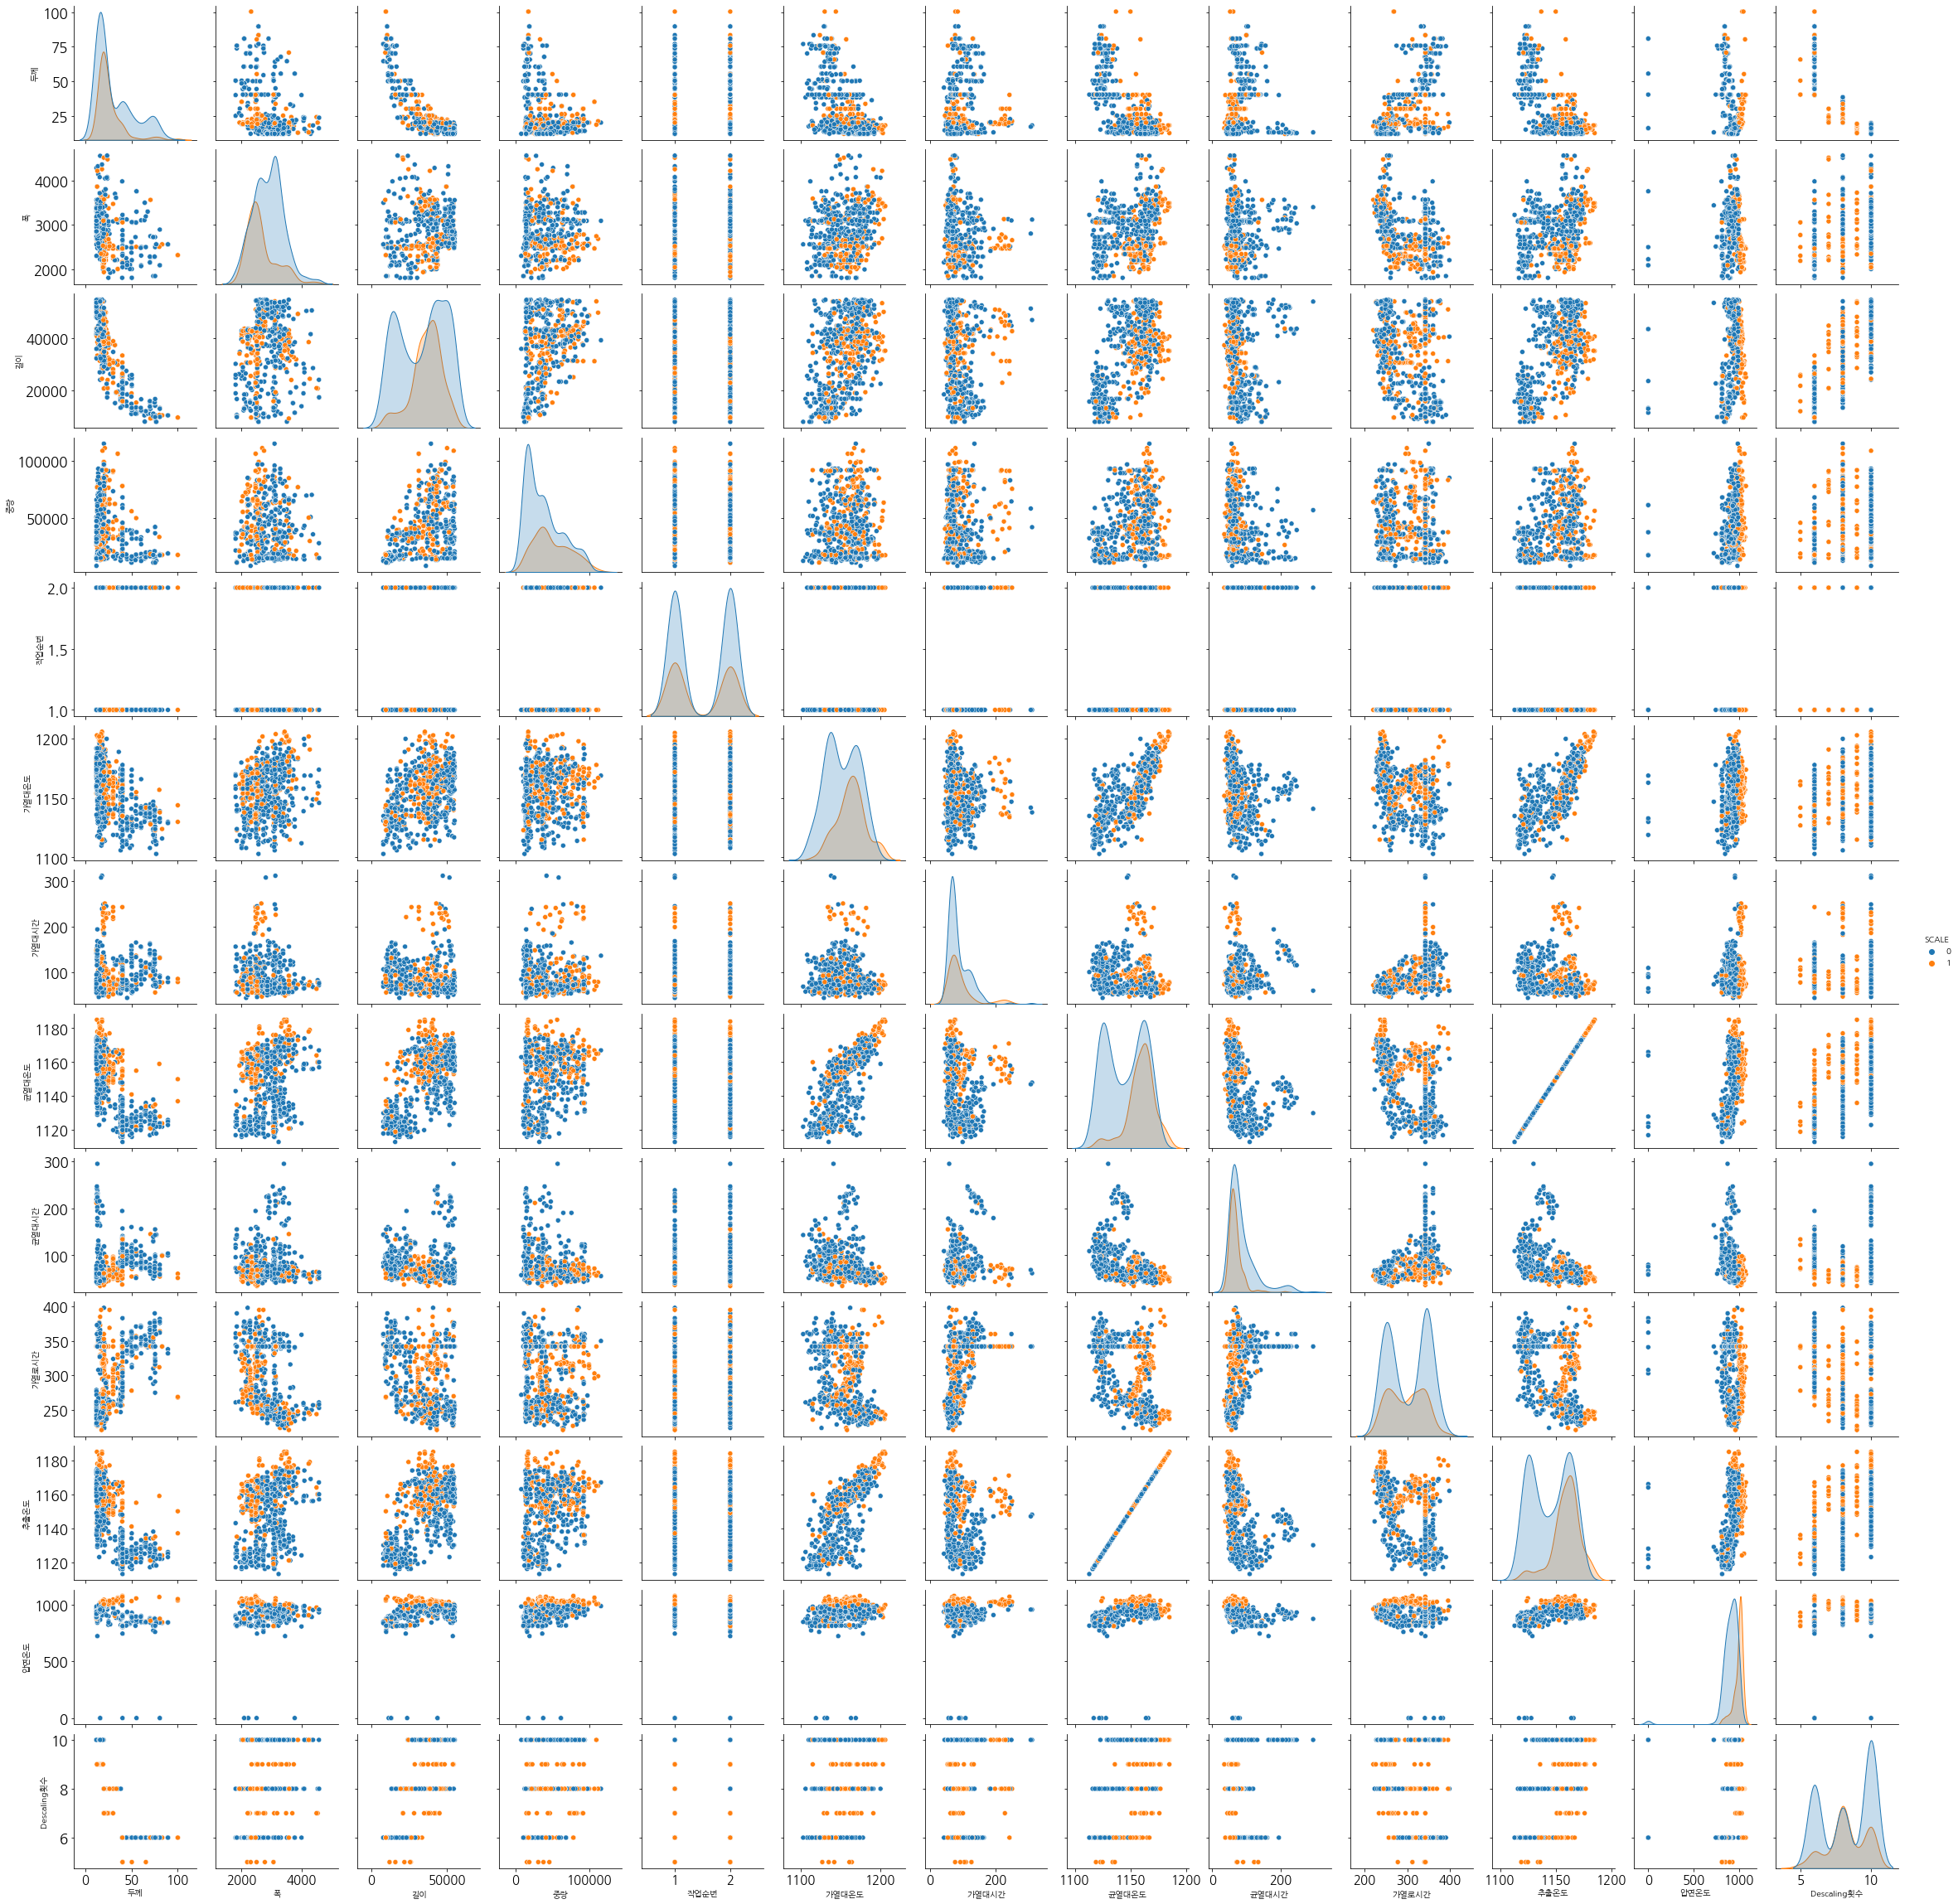

In [171]:
sns.pairplot(new_scale, hue = 'SCALE')

균열대 온도 제거 

####  2. Sample T -test 
##### 양품과 불량의 변수별 평균 비교

##### 2-1 각 변수들 정규성 테스트

In [120]:
scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SCALE              720 non-null    object
 1   SPEC               720 non-null    object
 2   STEEL_KIND         720 non-null    object
 3   PT_THK             720 non-null    int64 
 4   PT_WDTH            720 non-null    int64 
 5   PT_LTH             720 non-null    int64 
 6   PT_WGT             720 non-null    int64 
 7   FUR_NO             720 non-null    object
 8   FUR_NO_ROW         720 non-null    int64 
 9   FUR_HZ_TEMP        720 non-null    int64 
 10  FUR_HZ_TIME        720 non-null    int64 
 11  FUR_SZ_TEMP        720 non-null    int64 
 12  FUR_SZ_TIME        720 non-null    int64 
 13  FUR_TIME           720 non-null    int64 
 14  FUR_EXTEMP         720 non-null    int64 
 15  ROLLING_TEMP_T5    720 non-null    int64 
 16  HSB                720 non-null    object
 1

In [25]:
scale.drop(['PLATE_NO','ROLLING_DATE'], axis = 1, inplace = True)

In [51]:
scale['PT_THK'] = scale['PT_THK'].astype('int64')

In [153]:
scale['PT_THK'].describe()

count   720.00
mean     29.00
std      19.05
min      12.00
25%      16.00
50%      20.00
75%      40.00
max     100.00
Name: PT_THK, dtype: float64

### IQR을 이용한 이상치 제거 

In [325]:
scale['SCALE'] =scale['SCALE'].astype('object')
scale['HSB'] = scale['HSB'].astype('object')

In [343]:
def slicing(df, steel_kind):
    df =df[df['STEEL_KIND']==steel_kind]
    return df

def del_outlier(df, columns):
    
    des = df[columns].describe()
    iqr =des[6]-des[4]

    high = iqr*1.5 + des[6]
    low = des[4] -iqr*1.5 
#     print(high, low)
    df1 = df[(df[columns] > low) & (df[columns] < high)]
    return df1

def cal_iqr(df):
    df = df.select_dtypes(exclude ='object')
    for i in df.columns:
        des =df[i].describe()
        iqr =des[6]-des[4]
        high = iqr*1.5 + des[6]
        low = des[4] -iqr*1.5
        print(f'변수 {i} : high : {high} , low : {low} , iqr : {iqr}')
        
def make_df(df):
    df1 = del_outlier(df, 'PT_THK')
    df2 =  del_outlier(df1, 'PT_WDTH')
    df3 =  del_outlier(df2, 'PT_LTH')
    df4 =  del_outlier(df3, 'PT_WDTH')
    df5 =  del_outlier(df4, 'FUR_HZ_TEMP')
    df6 =  del_outlier(df5, 'FUR_HZ_TIME')
    df7 =  del_outlier(df6, 'FUR_SZ_TEMP')
    df8 =  del_outlier(df7, 'FUR_SZ_TIME')
    df9 =  del_outlier(df8, 'FUR_TIME')
    df10 =  del_outlier(df9, 'FUR_EXTEMP')
    df11 =  del_outlier(df10, 'ROLLING_TEMP_T5')
    return df11

In [358]:
c0 =slicing(scale, 'C0')
t7 = slicing(scale, 'T7')
t8 = slicing(scale, 'T8') 
t5 = slicing(scale, 'T5') 

In [360]:
c0.describe()

PT_THK  PT_WDTH   PT_LTH    PT_WGT  FUR_HZ_TEMP  FUR_HZ_TIME  \
count  503.00   503.00   503.00    503.00       503.00       503.00   
mean    19.54  2878.11 41319.79  48579.50      1161.81        86.00   
std      8.55   520.27  8976.80  25082.52        18.48        40.95   
min     12.03  1929.00  9547.00   7820.00      1110.00        45.00   
25%     15.08  2489.00 35999.50  29230.00      1149.00        64.00   
50%     18.11  2800.00 41967.00  42870.00      1164.00        72.00   
75%     20.30  3265.00 49066.50  66570.00      1174.00        88.00   
max    100.34  4575.00 54917.00 115080.00      1206.00       312.00   

       FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  FUR_EXTEMP  ROLLING_TEMP_T5  
count       503.00       503.00    503.00      503.00           503.00  
mean       1158.73        74.09    290.54     1158.73           969.73  
std          10.97        39.17     44.79       10.97            75.84  
min        1123.00        35.00    221.00     1123.00             0.00  
25%        1153.00        56.00    251.00     1153.00           942.50  
50%        1160.00        62.00    272.00     1160.00           977.00  
75%        1166.00        73.00    342.00     1166.00          1006.00  
max        1185.00       294.00    398.00     1185.00          1078.00

In [359]:
cal_iqr(c0)

변수 PT_THK : high : 28.1425 , low : 7.242500000000001 , iqr : 5.225
변수 PT_WDTH : high : 4429.0 , low : 1325.0 , iqr : 776.0
변수 PT_LTH : high : 68667.0 , low : 16399.0 , iqr : 13067.0
변수 PT_WGT : high : 122580.0 , low : -26780.0 , iqr : 37340.0
변수 FUR_HZ_TEMP : high : 1211.5 , low : 1111.5 , iqr : 25.0
변수 FUR_HZ_TIME : high : 124.0 , low : 28.0 , iqr : 24.0
변수 FUR_SZ_TEMP : high : 1185.5 , low : 1133.5 , iqr : 13.0
변수 FUR_SZ_TIME : high : 98.5 , low : 30.5 , iqr : 17.0
변수 FUR_TIME : high : 478.5 , low : 114.5 , iqr : 91.0
변수 FUR_EXTEMP : high : 1185.5 , low : 1133.5 , iqr : 13.0
변수 ROLLING_TEMP_T5 : high : 1101.25 , low : 847.25 , iqr : 63.5


In [363]:
c0 = make_df(c0)
t5 = make_df(t5)
t7 = make_df(t7)
t8 = make_df(t8)

In [364]:
c0.describe()

PT_THK  PT_WDTH   PT_LTH    PT_WGT  FUR_HZ_TEMP  FUR_HZ_TIME  \
count  305.00   305.00   305.00    305.00       305.00       305.00   
mean    17.63  2897.78 42670.41  46764.59      1167.73        69.80   
std      3.61   519.96  7791.89  24231.08        16.59        10.31   
min     12.03  1929.00 20723.00   7820.00      1124.00        45.00   
25%     14.58  2520.00 37250.00  28260.00      1158.00        63.00   
50%     18.10  2815.00 42641.00  42720.00      1170.00        69.00   
75%     20.13  3277.00 49658.00  65200.00      1178.00        75.00   
max     26.24  4373.00 54917.00 111200.00      1204.00        99.00   

       FUR_SZ_TEMP  FUR_SZ_TIME  FUR_TIME  FUR_EXTEMP  ROLLING_TEMP_T5  
count       305.00       305.00    305.00      305.00           305.00  
mean       1162.94        61.13    274.31     1162.94           970.63  
std           7.96         9.31     41.12        7.96            37.76  
min        1144.00        40.00    221.00     1144.00           877.00  
25%        1158.00        55.00    244.00     1158.00           942.00  
50%        1163.00        60.00    257.00     1163.00           976.00  
75%        1168.00        67.00    307.00     1168.00           998.00  
max        1181.00        85.00    398.00     1181.00          1044.00

In [357]:
cal_iqr(c0)

변수 PT_THK : high : 27.630000000000003 , low : 7.549999999999998 , iqr : 5.020000000000001
변수 PT_WDTH : high : 4380.0 , low : 1404.0 , iqr : 744.0
변수 PT_LTH : high : 67112.5 , low : 19332.5 , iqr : 11945.0
변수 PT_WGT : high : 122755.0 , low : -27925.0 , iqr : 37670.0
변수 FUR_HZ_TEMP : high : 1211.5 , low : 1119.5 , iqr : 23.0
변수 FUR_HZ_TIME : high : 100.5 , low : 40.5 , iqr : 15.0
변수 FUR_SZ_TEMP : high : 1184.5 , low : 1140.5 , iqr : 11.0
변수 FUR_SZ_TIME : high : 87.5 , low : 35.5 , iqr : 13.0
변수 FUR_TIME : high : 422.5 , low : 138.5 , iqr : 71.0
변수 FUR_EXTEMP : high : 1184.5 , low : 1140.5 , iqr : 11.0
변수 ROLLING_TEMP_T5 : high : 1077.0 , low : 869.0 , iqr : 52.0


In [371]:
def check_norm(df,steel_kind, al):
    from scipy.stats import shapiro
    import scipy.stats as stats
    df = df[df['STEEL_KIND']== steel_kind]
    no = df[df['SCALE']== 0]
    pro =df[df['SCALE']== 1] 
    def draw_qqplot(df, i):
        if is_object_dtype(df[i]) == False:
            if al != 'all':
                fig, ax =plt.subplots(2,3, figsize =(20,8))
                sns.histplot(data = no , x = i ,kde=True,color = 'r' ,ax= ax[0,0], label = '양품')
                stats.probplot(no[i], plot = ax[0,1])
                sns.boxplot(no[i] , ax = ax[0,2])


                sns.histplot(data = pro , x = i ,kde=True,color = 'b' ,ax= ax[1,0], label ='불량')
                stats.probplot(pro[i], plot = ax[1,1])
                sns.boxplot(pro[i] , ax = ax[1,2])
                print(fig)
            elif al == 'all':
                fig, ax =plt.subplots(1,3, figsize =(20,8))
                sns.histplot(data = df , x = i ,kde=True,color = 'r' ,ax= ax[0], label = '양품')
                stats.probplot(df[i], plot = ax[1])
                sns.boxplot(df[i] , ax = ax[2])
        
        
    def normal_test(df, i):            
        if is_object_dtype(df[i]) == False:
            stats , pval = shapiro(df[i])
            print(' 샤피로 : 검정 통계량 : {}, p_values : {}'.format(stats, pval))
            if pval < 0.05:
                print(" 샤피로 : P_value : {}로 변수 {}는 정규성을 가지지 않는다.".format(pval,i))

            elif pval > 0.05:
                print(" 샤피로 :  P_value : {}로 변수 {}는 정규성을 가진다.".format(pval,i))
    for i in df.columns:
        draw_qqplot(df, i)
        plt.show()
        normal_test(df, i)
        

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


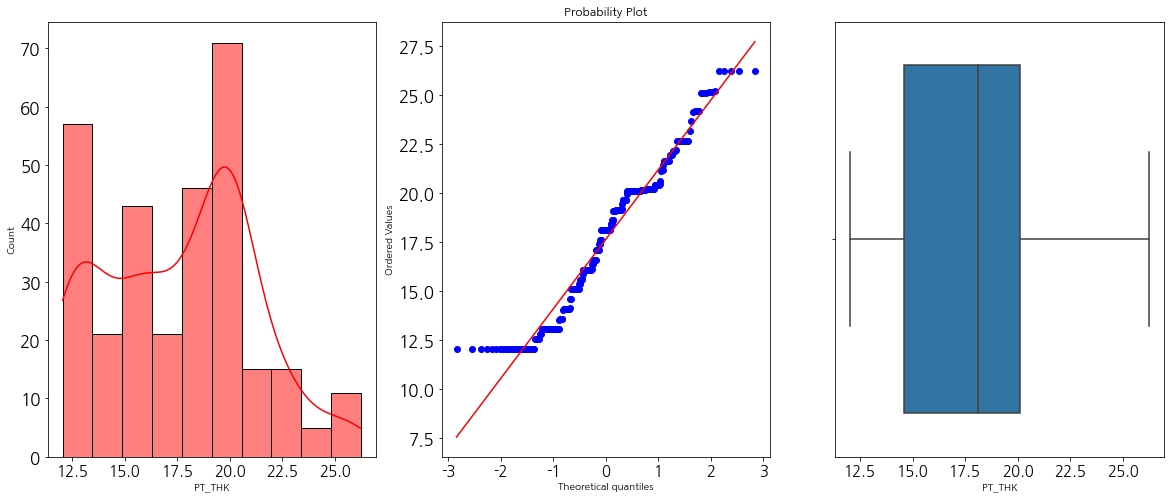

 샤피로 : 검정 통계량 : 0.9554417133331299, p_values : 5.14669160622816e-08
 샤피로 : P_value : 5.14669160622816e-08로 변수 PT_THK는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


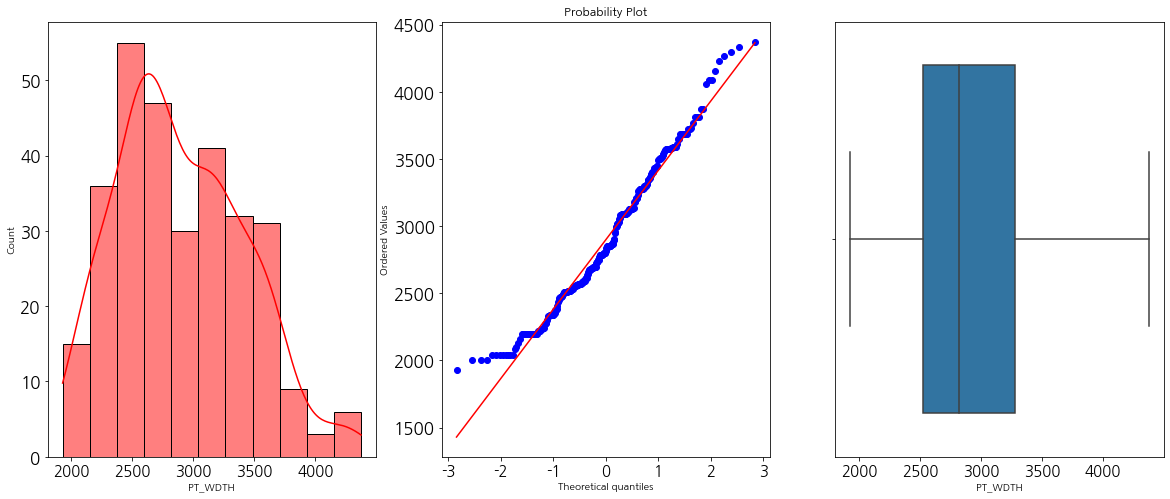

 샤피로 : 검정 통계량 : 0.9747556447982788, p_values : 3.350530823809095e-05
 샤피로 : P_value : 3.350530823809095e-05로 변수 PT_WDTH는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


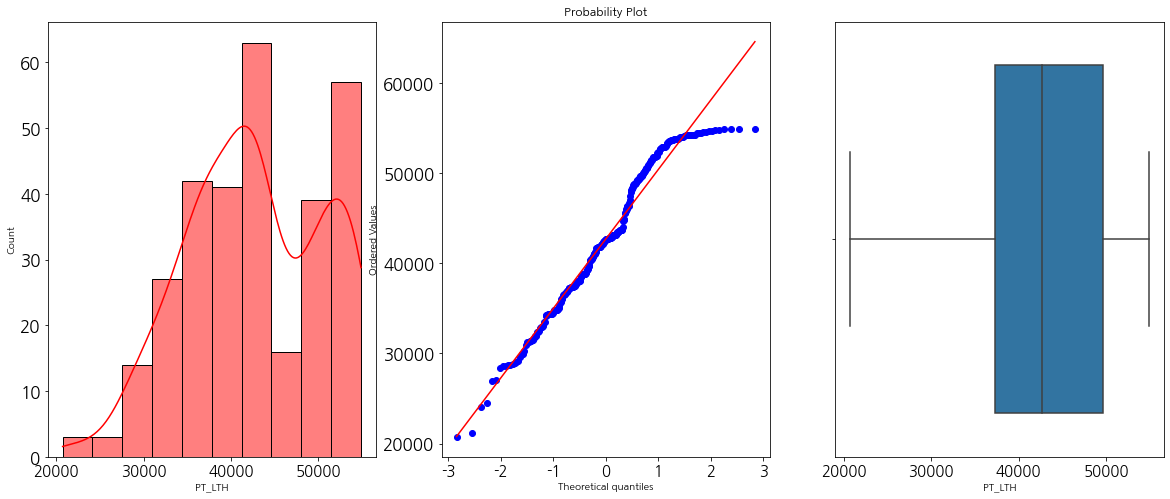

 샤피로 : 검정 통계량 : 0.9651395082473755, p_values : 1.04321031813015e-06
 샤피로 : P_value : 1.04321031813015e-06로 변수 PT_LTH는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


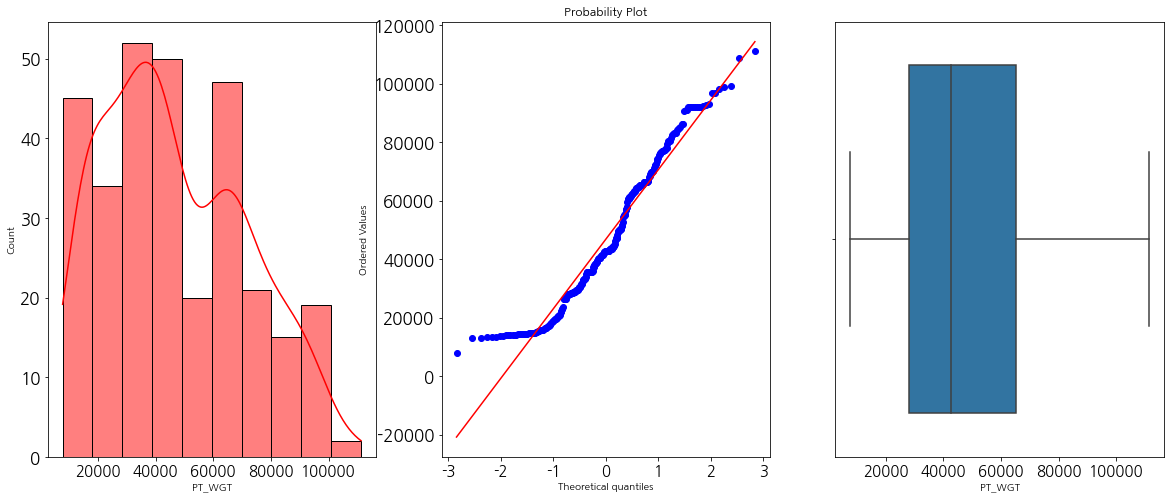

 샤피로 : 검정 통계량 : 0.9504401087760925, p_values : 1.2636218293948787e-08
 샤피로 : P_value : 1.2636218293948787e-08로 변수 PT_WGT는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


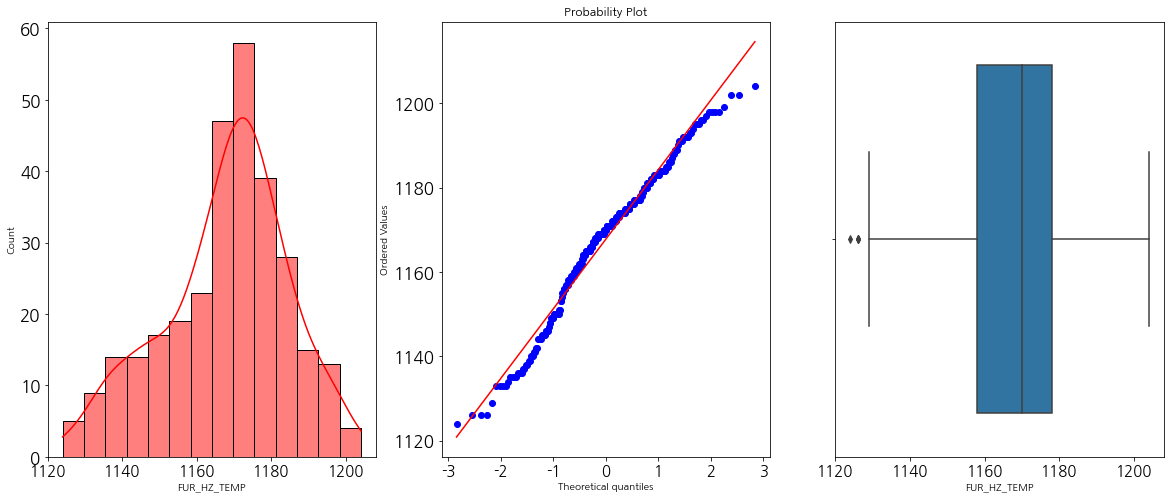

 샤피로 : 검정 통계량 : 0.9766153693199158, p_values : 7.036420720396563e-05
 샤피로 : P_value : 7.036420720396563e-05로 변수 FUR_HZ_TEMP는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


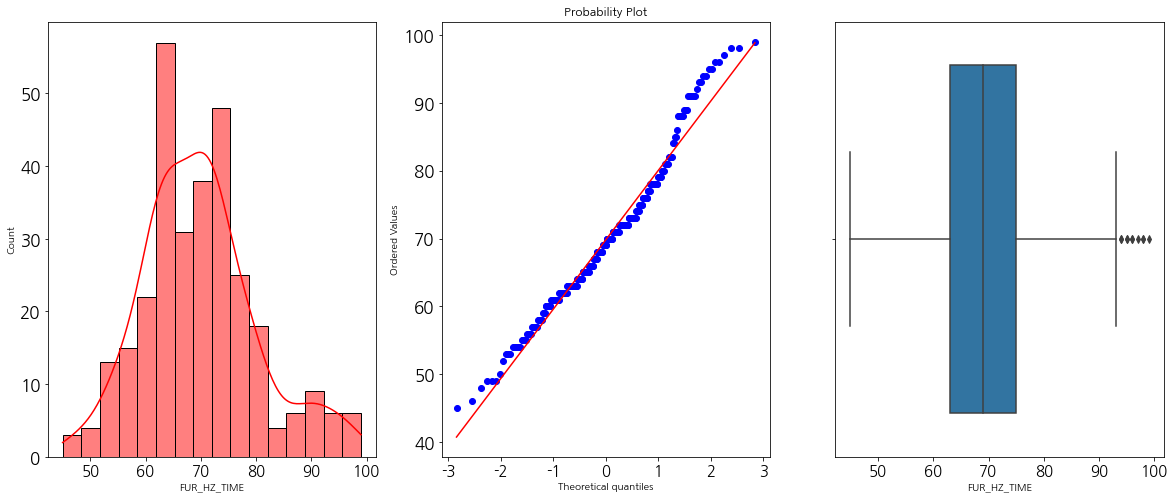

 샤피로 : 검정 통계량 : 0.9722478985786438, p_values : 1.281677668885095e-05
 샤피로 : P_value : 1.281677668885095e-05로 변수 FUR_HZ_TIME는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


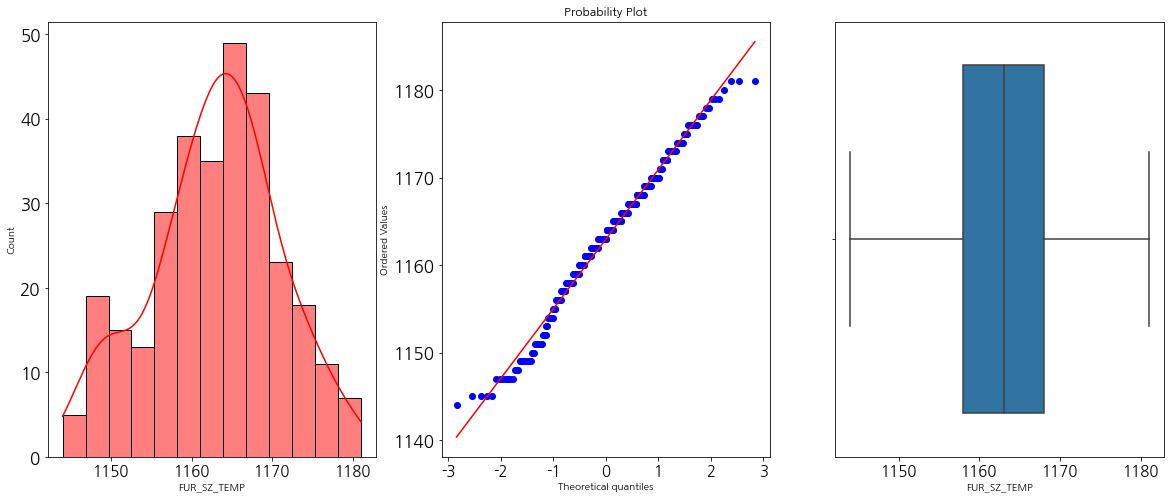

 샤피로 : 검정 통계량 : 0.986147940158844, p_values : 0.004986956715583801
 샤피로 : P_value : 0.004986956715583801로 변수 FUR_SZ_TEMP는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


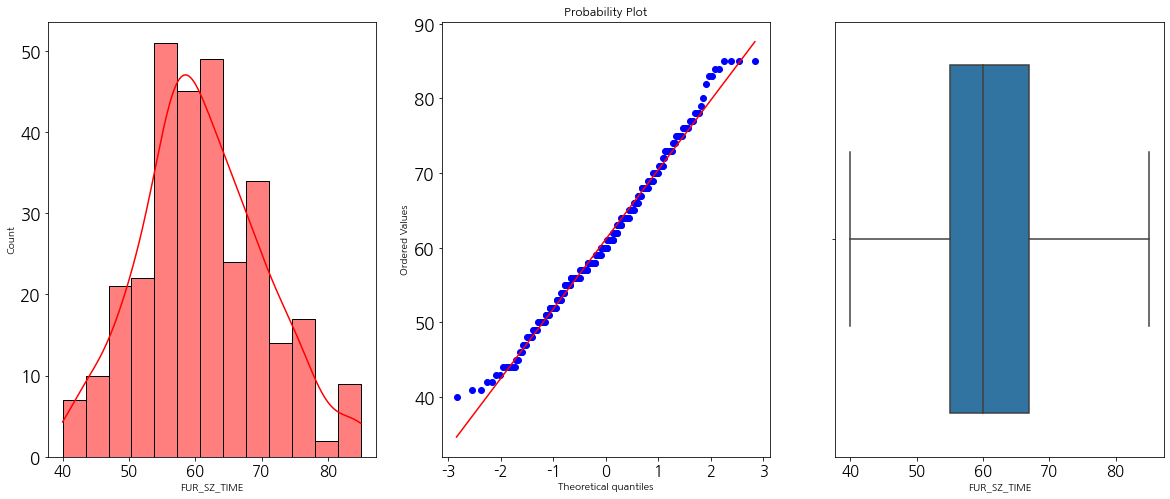

 샤피로 : 검정 통계량 : 0.988874614238739, p_values : 0.019614286720752716
 샤피로 : P_value : 0.019614286720752716로 변수 FUR_SZ_TIME는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


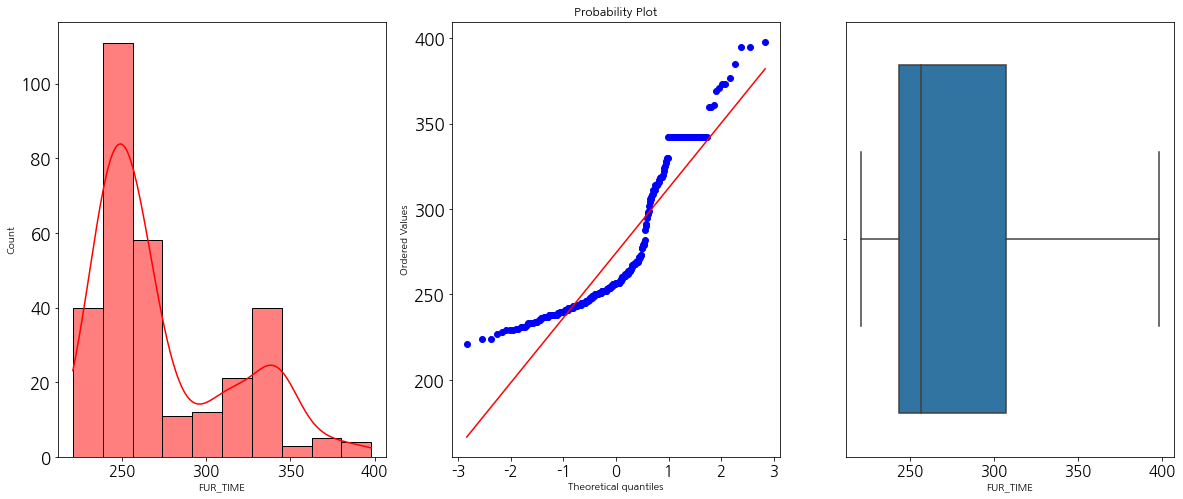

 샤피로 : 검정 통계량 : 0.8406893610954285, p_values : 4.607222965736218e-17
 샤피로 : P_value : 4.607222965736218e-17로 변수 FUR_TIME는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


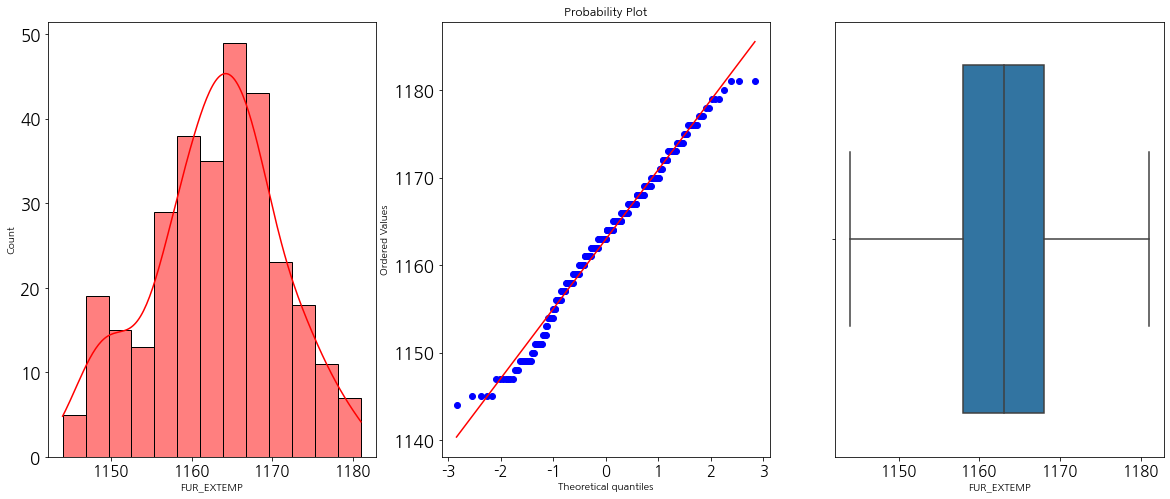

 샤피로 : 검정 통계량 : 0.986147940158844, p_values : 0.004986956715583801
 샤피로 : P_value : 0.004986956715583801로 변수 FUR_EXTEMP는 정규성을 가지지 않는다.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


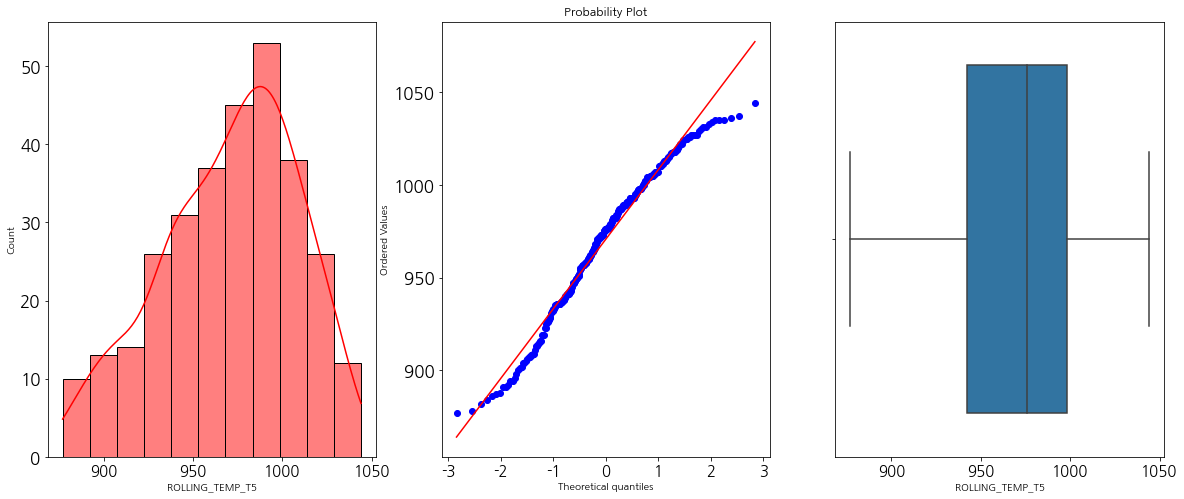

 샤피로 : 검정 통계량 : 0.9747296571731567, p_values : 3.3165866625495255e-05
 샤피로 : P_value : 3.3165866625495255e-05로 변수 ROLLING_TEMP_T5는 정규성을 가지지 않는다.


In [372]:
check_norm(c0, 'C0', 'all')

In [322]:
def t_test(df):
    from scipy import stats
#     df['두께'] = df['두께'].astype('int32')
#     df.drop('폭',axis = 1 , inplace =True)
#     df.drop('길이',axis = 1 , inplace =True)
    col = df.select_dtypes(exclude ='object').columns
    col_list = []
    for i in col:
        if i =='SCALE':
            continue
        else:
            pro = df[df['SCALE']== 1][i]
            no = df[df['SCALE']== 0][i]
#             print(i)
#             display(df.info())
            t_result = stats.ttest_ind(pro, no)
            print('--------------------- 2 Sample T-test result ----------------------------')
            print()
            df.boxplot(column = i ,by = 'SCALE' ,figsize = (7,7))
            plt.show()
            print()
            print('귀무 가설 : 변수 {}의 불량과 양품 평균의 차이는 유의하지 않다'.format(i))
            print('대립 가설 : 변수 {}의 불량과 양품 평균의 차이는 유의하다.'.format(i))
            print()
            pval = t_result.pvalue
            print(' P-value : {}'.format(pval))
            print()
            if pval< 0.05:
                print('{}는 유의수준 0.05에서 유의한 차이를 가진다.'.format(i))
                print()
                col_list.append(i)
            elif pval > 0.05:
                print('{}는 유의수준 0.05에서 유의한 차이를 가지지 않는다.'.format(i))
                print()
    print('유의수준 0.05 에서 양품과 불량의 차이가 유의한 변수 리스트 ')
    print(col_list)
            



--------------------- 2 Sample T-test result ----------------------------



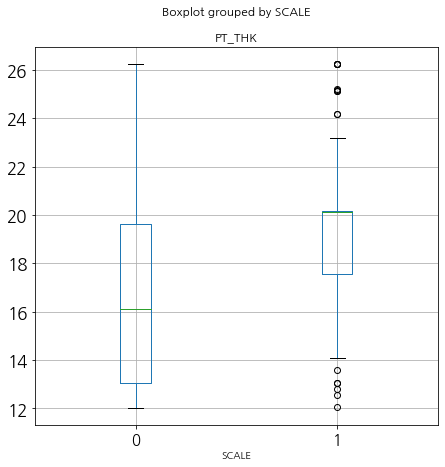


귀무 가설 : 변수 PT_THK의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 PT_THK의 불량과 양품 평균의 차이는 유의하다.

 P-value : 2.0789080035224723e-11

PT_THK는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



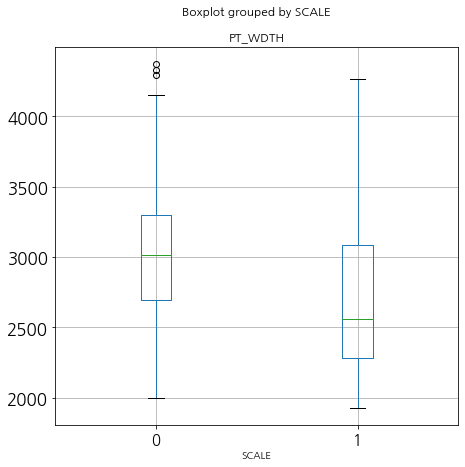


귀무 가설 : 변수 PT_WDTH의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 PT_WDTH의 불량과 양품 평균의 차이는 유의하다.

 P-value : 1.535343079635772e-07

PT_WDTH는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



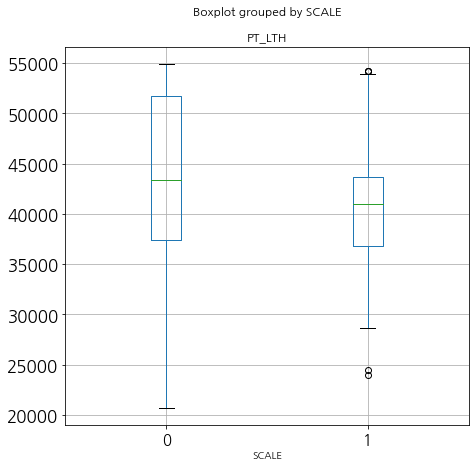


귀무 가설 : 변수 PT_LTH의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 PT_LTH의 불량과 양품 평균의 차이는 유의하다.

 P-value : 0.0010071579124589119

PT_LTH는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



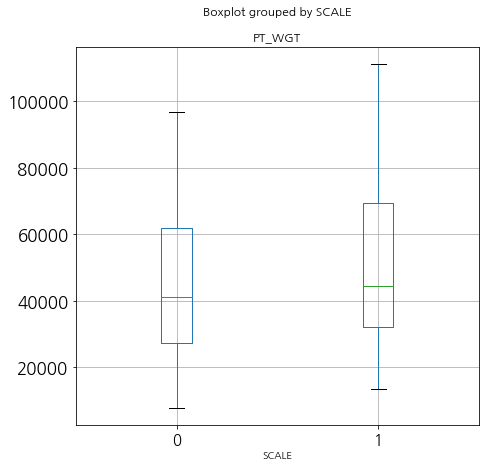


귀무 가설 : 변수 PT_WGT의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 PT_WGT의 불량과 양품 평균의 차이는 유의하다.

 P-value : 0.005435726365530851

PT_WGT는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



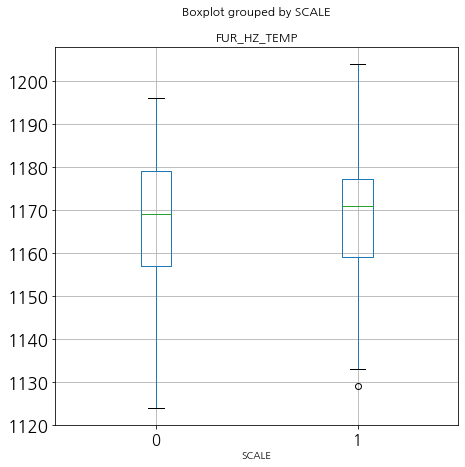


귀무 가설 : 변수 FUR_HZ_TEMP의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_HZ_TEMP의 불량과 양품 평균의 차이는 유의하다.

 P-value : 0.22042803513246212

FUR_HZ_TEMP는 유의수준 0.05에서 유의한 차이를 가지지 않는다.

--------------------- 2 Sample T-test result ----------------------------



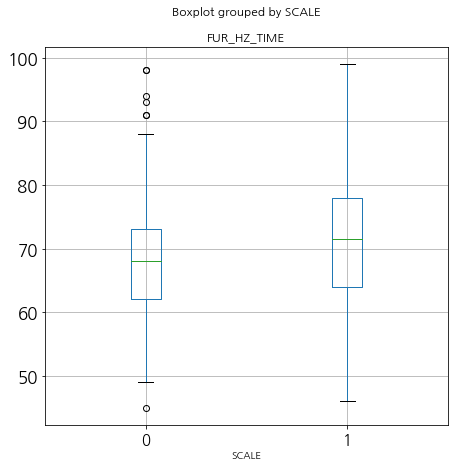


귀무 가설 : 변수 FUR_HZ_TIME의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_HZ_TIME의 불량과 양품 평균의 차이는 유의하다.

 P-value : 0.0026348560285429316

FUR_HZ_TIME는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



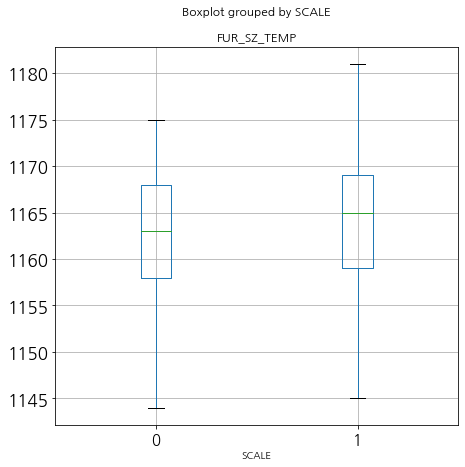


귀무 가설 : 변수 FUR_SZ_TEMP의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_SZ_TEMP의 불량과 양품 평균의 차이는 유의하다.

 P-value : 0.026133568000404603

FUR_SZ_TEMP는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



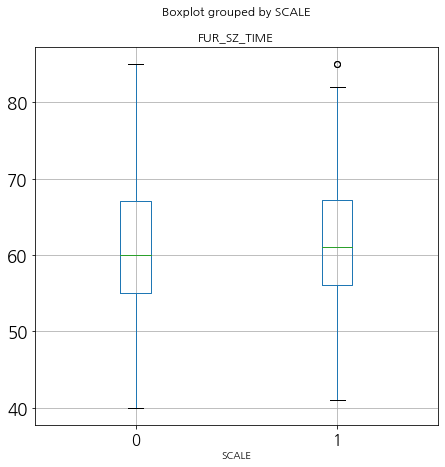


귀무 가설 : 변수 FUR_SZ_TIME의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_SZ_TIME의 불량과 양품 평균의 차이는 유의하다.

 P-value : 0.8025722291035305

FUR_SZ_TIME는 유의수준 0.05에서 유의한 차이를 가지지 않는다.

--------------------- 2 Sample T-test result ----------------------------



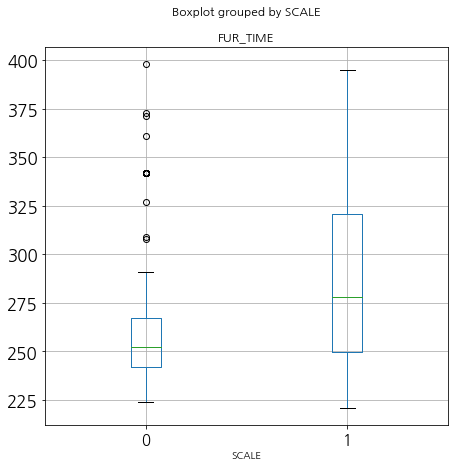


귀무 가설 : 변수 FUR_TIME의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_TIME의 불량과 양품 평균의 차이는 유의하다.

 P-value : 1.7647014250455175e-07

FUR_TIME는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



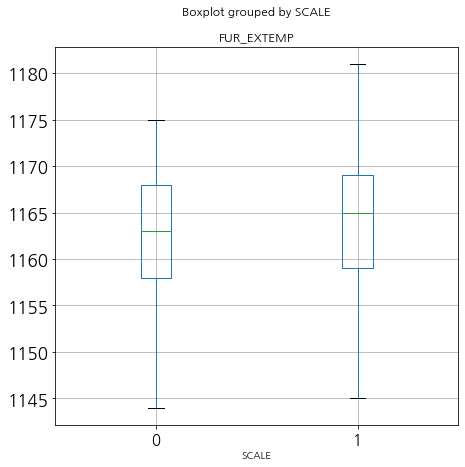


귀무 가설 : 변수 FUR_EXTEMP의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 FUR_EXTEMP의 불량과 양품 평균의 차이는 유의하다.

 P-value : 0.026133568000404603

FUR_EXTEMP는 유의수준 0.05에서 유의한 차이를 가진다.

--------------------- 2 Sample T-test result ----------------------------



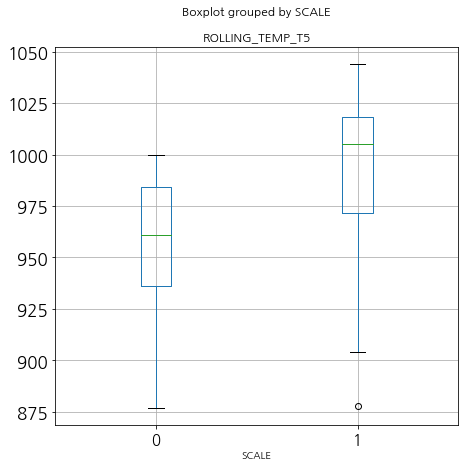


귀무 가설 : 변수 ROLLING_TEMP_T5의 불량과 양품 평균의 차이는 유의하지 않다
대립 가설 : 변수 ROLLING_TEMP_T5의 불량과 양품 평균의 차이는 유의하다.

 P-value : 1.4015116037627452e-18

ROLLING_TEMP_T5는 유의수준 0.05에서 유의한 차이를 가진다.

유의수준 0.05 에서 양품과 불량의 차이가 유의한 변수 리스트 
['PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5']


In [366]:
t_test(c0)

### 2 sample T- test result (연속형 변수)  

#### -------------유의 수준 0.05 에서 유의한 차이를 보인 변수 ------------------  

#### 'PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5'  

#### 위의 변수를 불량의 원인을 주는 잠재적 Vital few 선정하고,  불량 예측모델에 반영하겠다.


In [442]:
def chisqure_test(df):
    from scipy.stats import chi2_contingency
    df = df.select_dtypes('object')
    col_list = []
    for columns in df.columns:
        if columns == 'SCALE':
            continue
            
        else:    
            chi1 = pd.crosstab(index = df['SCALE'], columns =df[columns] ).T
            chi =pd.crosstab(index = df['SCALE'], columns =df[columns] )
            chi1['ratio'] =(chi1[1] /(chi1[0] +chi1[1]))*100
            chi_res = chi2_contingency(chi)
            print('-------------------Chi_square Test Result ----------------------')
            print()
            print('대상 Column : {}'.format(columns))
            print()
            print('목적 : 동질성 검증')
            print()
            display(chi1.T)
            print()
            print('귀무가설  - columns : {} 의 그룹별 불량율은 서로 유의하지 않다.'.format(columns))
            print('대립가설  - columns : {} 의 그룹별 불량율은 서로 유의하다.'.format(columns))
            print()
            if chi_res[1] < 0.05:
                print('{} 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서  서로 유의하다.'.format(columns))
                print()
                print('P_value : {}'.format(chi_res[1]))
                print()
                col_list.append(columns)
            elif chi_res[1] > 0.05:
                print('{} 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서 서로 유의하지 않다.'.format(columns))
                print()
                print('P_value : {}'.format(chi_res[1]))
    print()
    print('유의한 변수 list')
    print(col_list)

In [527]:
chisqure_test(scale)

-------------------Chi_square Test Result ----------------------

대상 Column : SPEC

목적 : 동질성 검증



SPEC   A131-DH36TM  A283-C  A516-60  A709-36  AB/A  AB/AH32  AB/B  AB/EH32-TM  \
SCALE                                                                           
0             0.00    1.00     1.00     1.00  3.00     4.00  3.00        2.00   
1             1.00    5.00     1.00     0.00  4.00     1.00  3.00        0.00   
ratio       100.00   83.33    50.00     0.00 57.14    20.00 50.00        0.00   

SPEC   AB/EH36-TM  API-2W-50T  ...  NV-A32-TM  NV-A36-TM  NV-B  NV-D32-TM  \
SCALE                          ...                                          
0           16.00        2.00  ...       2.00       2.00  1.00       4.00   
1            1.00        0.00  ...       1.00       0.00  2.00       0.00   
ratio        5.88        0.00  ...      33.33       0.00 66.67       0.00   

SPEC   NV-D36-TM  NV-E32-TM  NV-E36-TM  PILAC-BT33  SA283-C  V42JBN3  
SCALE                                                                 
0           4.00       2.00       5.00       38.00    11.00     3.00  
1           1.00       0.00       0.00        2.00    10.00     1.00  
ratio      20.00       0.00       0.00        5.00    47.62    25.00  

[3 rows x 66 columns]


귀무가설  - columns : SPEC 의 그룹별 불량율은 서로 유의하지 않다.
대립가설  - columns : SPEC 의 그룹별 불량율은 서로 유의하다.

SPEC 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서  서로 유의하다.

P_value : 2.2423259331578305e-17

-------------------Chi_square Test Result ----------------------

대상 Column : STEEL_KIND

목적 : 동질성 검증



STEEL_KIND     C0     C1    C3    T0    T1   T3    T5    T7    T8
SCALE                                                            
0          291.00   0.00  6.00 14.00 16.00 2.00 41.00 29.00 90.00
1          212.00   1.00  1.00  2.00  2.00 0.00  2.00  6.00  5.00
ratio       42.15 100.00 14.29 12.50 11.11 0.00  4.65 17.14  5.26


귀무가설  - columns : STEEL_KIND 의 그룹별 불량율은 서로 유의하지 않다.
대립가설  - columns : STEEL_KIND 의 그룹별 불량율은 서로 유의하다.

STEEL_KIND 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서  서로 유의하다.

P_value : 8.754375220184529e-15

-------------------Chi_square Test Result ----------------------

대상 Column : FUR_NO

목적 : 동질성 검증



FUR_NO    1호기    2호기    3호기
SCALE                      
0      167.00 167.00 155.00
1       73.00  70.00  88.00
ratio   30.42  29.54  36.21


귀무가설  - columns : FUR_NO 의 그룹별 불량율은 서로 유의하지 않다.
대립가설  - columns : FUR_NO 의 그룹별 불량율은 서로 유의하다.

FUR_NO 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서 서로 유의하지 않다.

P_value : 0.2328665147101706
-------------------Chi_square Test Result ----------------------

대상 Column : FUR_NO_ROW

목적 : 동질성 검증



FUR_NO_ROW      1      2
SCALE                   
0          242.00 247.00
1          120.00 111.00
ratio       33.15  31.01


귀무가설  - columns : FUR_NO_ROW 의 그룹별 불량율은 서로 유의하지 않다.
대립가설  - columns : FUR_NO_ROW 의 그룹별 불량율은 서로 유의하다.

FUR_NO_ROW 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서 서로 유의하지 않다.

P_value : 0.59178661655368
-------------------Chi_square Test Result ----------------------

대상 Column : HSB

목적 : 동질성 검증



HSB        0      1
SCALE              
0       0.00 489.00
1      33.00 198.00
ratio 100.00  28.82


귀무가설  - columns : HSB 의 그룹별 불량율은 서로 유의하지 않다.
대립가설  - columns : HSB 의 그룹별 불량율은 서로 유의하다.

HSB 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서  서로 유의하다.

P_value : 5.983107800489556e-17

-------------------Chi_square Test Result ----------------------

대상 Column : ROLLING_DESCALING

목적 : 동질성 검증



ROLLING_DESCALING     5      6      7      8      9      10
SCALE                                                      
0                   0.00 150.00   0.00 109.00   0.00 230.00
1                   5.00  26.00  15.00  99.00  20.00  66.00
ratio             100.00  14.77 100.00  47.60 100.00  22.30


귀무가설  - columns : ROLLING_DESCALING 의 그룹별 불량율은 서로 유의하지 않다.
대립가설  - columns : ROLLING_DESCALING 의 그룹별 불량율은 서로 유의하다.

ROLLING_DESCALING 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서  서로 유의하다.

P_value : 1.6570240858564675e-29

-------------------Chi_square Test Result ----------------------

대상 Column : WORK_GR

목적 : 동질성 검증



WORK_GR     1조     2조     3조     4조
SCALE                              
0       122.00 120.00 118.00 129.00
1        67.00  45.00  54.00  65.00
ratio    35.45  27.27  31.40  33.51


귀무가설  - columns : WORK_GR 의 그룹별 불량율은 서로 유의하지 않다.
대립가설  - columns : WORK_GR 의 그룹별 불량율은 서로 유의하다.

WORK_GR 의 그룹별 불량율은 유의수준 0.05 (신뢰구간 95%) 에서 서로 유의하지 않다.

P_value : 0.39897724814139857

유의한 변수 list
['SPEC', 'STEEL_KIND', 'HSB', 'ROLLING_DESCALING']


#### Chi_Square Test result (이산형 변수)  
##### -------------유의한 변수 ---------------  

##### * 'SPEC', 'STEEL_KIND', 'HSB', 'ROLLING_DESCALING'  

##### * 해당 변수들 또한 잠재적 Vital few로 지정하고 불만 예측 모델에 반영해야겠다.

In [ ]:
'SPEC', 'STEEL_KIND', 'HSB', 'ROLLING_DESCALING' 'PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5'  

## 3. PCA(주성분 분석) 
### - 모델생성 이전 PCA(주성분 분석)을 통해 Column을 추려내고, 통계적 검증을 통해 확인한 잠재적 Vital few와 비교  

In [506]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler =StandardScaler()
explain =scale.select_dtypes(exclude = 'object')
col = explain.columns
explain1 =scaler.fit_transform(explain)
explain2 =pd.DataFrame(explain1, columns = col)




pca = PCA(n_components = 3)
pc = pca.fit(explain1)
B = pca.transform(explain1)

In [519]:
B

array([[ 1.40140614, -1.36119602,  0.58642255],
       [ 1.28993124, -1.30325982,  0.45082157],
       [ 2.22008203, -1.32018027,  0.69951002],
       ...,
       [-1.79603148, -1.25364774,  0.99884362],
       [-2.70604553, -0.24457246,  0.26570839],
       [-3.23988649, -0.35033387,  0.32976496]])

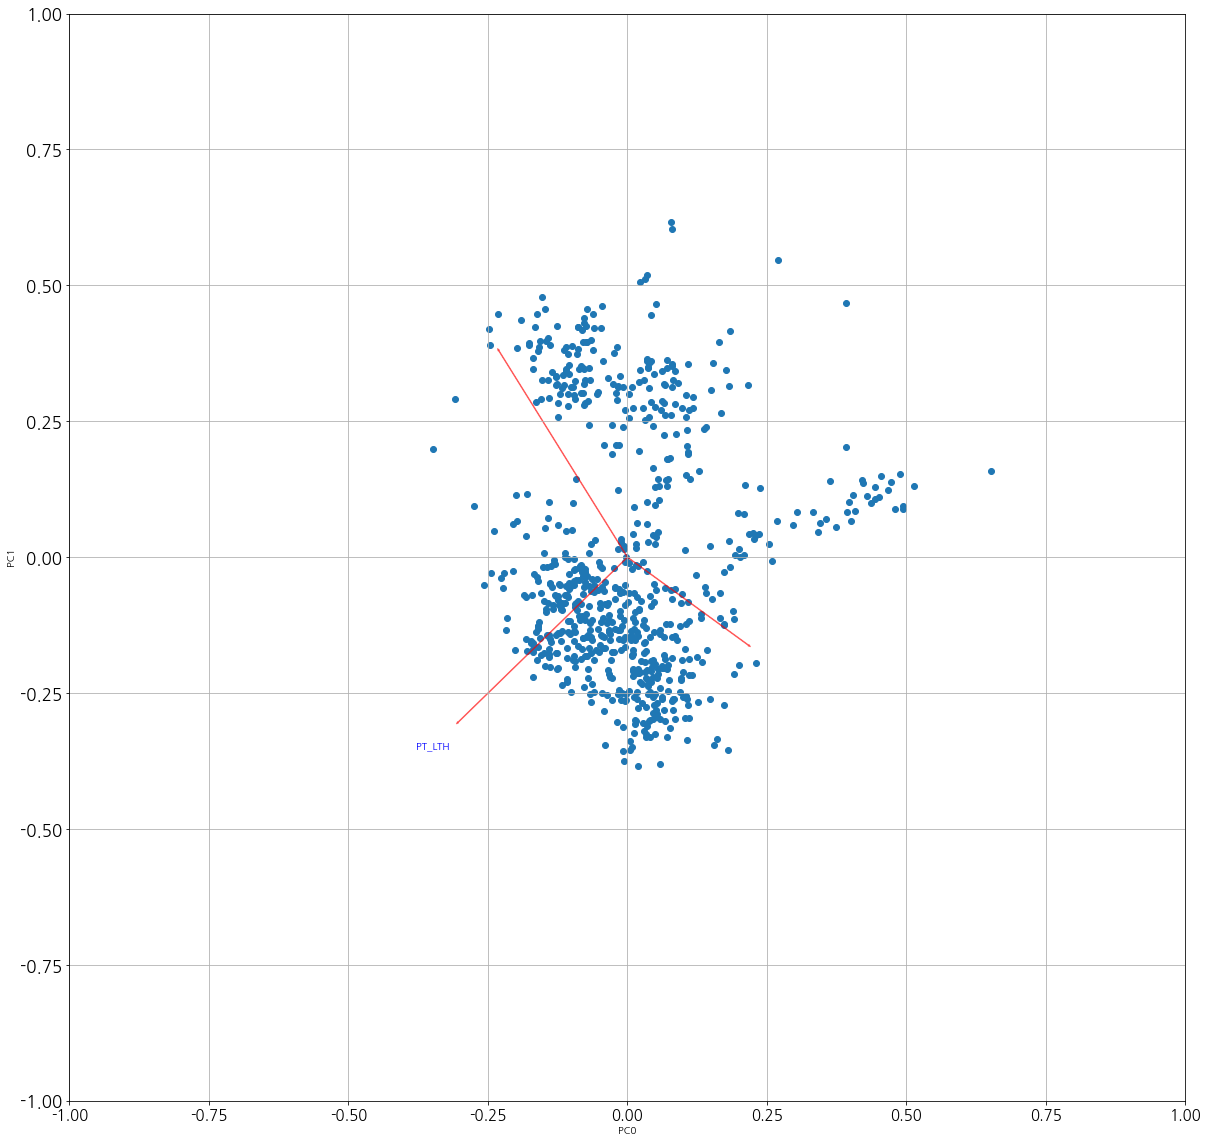

In [525]:
biplot(B, pca.components_, 0,1, labels=explain2.columns)

In [501]:
def biplot(score,coeff,pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    xs = score[:,pca1]
    ys = score[:,pca2]
    n=score.shape[1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.figure(figsize = (20,20))
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
        plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='blue', ha='center', va='center')
    else:
        plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='blue', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    plt.grid()
# biplot(B, pca_wine.components_, 1, 2, labels=wine_feature.columns)

In [516]:
pca.components_

array([[ 0.38010769, -0.14121498, -0.34732825, -0.20714909, -0.34222383,
         0.12582704, -0.43117266,  0.19959917,  0.27247548, -0.43117266,
        -0.23060092],
       [-0.16202776, -0.2980516 ,  0.30598312,  0.34830217,  0.01010615,
         0.52893368,  0.01303381,  0.28324313,  0.51227783,  0.01303381,
         0.21703502],
       [-0.3035743 ,  0.59258189,  0.2362798 , -0.09304826,  0.02236759,
        -0.01918906, -0.09689292,  0.61657688, -0.01714529, -0.09689292,
        -0.30347523]])

In [523]:
#주성분 분석 및 결과: 고유값(Eigenvalue) 확인 및 주성분 개수 결정

#주성분 분석 통계량 저장: 주성분 분석, Eigevalue, Eigenvalue ratio
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1,4)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

PrinNo  EigenValues  EigenValueRatio  CumEigenValueRatio
0       1         4.81             0.44                0.44
1       2         1.53             0.14                0.58
2       3         1.19             0.11                0.68

In [479]:
explain2.describe()

PT_THK  PT_WDTH  PT_LTH  PT_WGT  FUR_HZ_TEMP  FUR_HZ_TIME  FUR_SZ_TEMP  \
count  720.00   720.00  720.00  720.00       720.00       720.00       720.00   
mean    -0.00     0.00    0.00   -0.00        -0.00         0.00        -0.00   
std      1.00     1.00    1.00    1.00         1.00         1.00         1.00   
min     -0.90    -1.95   -1.91   -1.36        -2.51        -1.21        -2.09   
25%     -0.69    -0.66   -0.84   -0.96        -0.78        -0.63        -1.01   
50%     -0.48    -0.16    0.22   -0.22         0.13        -0.36         0.30   
75%      0.56     0.61    0.68    0.79         0.75         0.33         0.82   
max      3.71     3.42    1.49    2.98         2.43         5.94         2.01   

       FUR_SZ_TIME  FUR_TIME  FUR_EXTEMP  ROLLING_TEMP_T5  
count       720.00    720.00      720.00           720.00  
mean          0.00      0.00       -0.00            -0.00  
std           1.00      1.00        1.00             1.00  
min          -1.20     -1.75       -2.09            -8.66  
25%          -0.58     -0.96       -1.01            -0.41  
50%          -0.31      0.08        0.30             0.16  
75%           0.20      0.91        0.82             0.56  
max           5.91      2.15        2.01             1.34

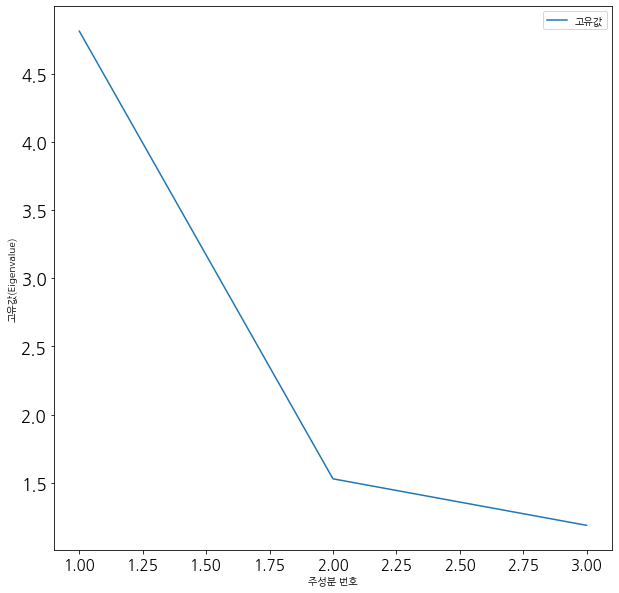

In [464]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label='고유값')

#그래프 label, legend 설정
plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분 번호')
plt.legend(loc='best')

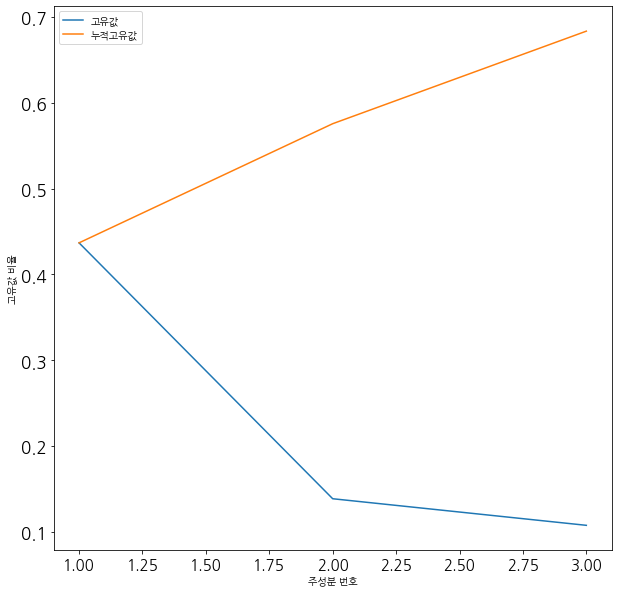

In [465]:
#고유값 비율 그래프 생성
plt.plot(df_pca_stat['PrinNo'],df_pca_stat['EigenValueRatio'], label = '고유값')

#누적 고유값의 비율 그래프 생성
plt.plot(df_pca_stat['PrinNo'],df_pca_stat['CumEigenValueRatio'], label = '누적고유값')
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc='best')
# 위와 아래 그래프를 확인해 보면 

In [526]:
x_cols = pd.DataFrame({'Feature': explain.columns})

#주성분 Prin1~4까지의 고유벡터 저장
#전치 결과 pd.DataFrame(pca.components_,colums = ['Prin1'~'Prin4'], axis=1)
#파이썬 PCA 분석 시 SVD(singular value decomposition) 연산 방식의 차이 반영(전치, 부호 변경)

df_eigenvector = \
pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1,columns = ['Prin1','Prin2','Prin3'])], axis=1)
df_eigenvector.round(3)

Feature  Prin1  Prin2  Prin3
0            PT_THK  -0.38   0.16   0.30
1           PT_WDTH   0.14   0.30  -0.59
2            PT_LTH   0.35  -0.31  -0.24
3            PT_WGT   0.21  -0.35   0.09
4       FUR_HZ_TEMP   0.34  -0.01  -0.02
5       FUR_HZ_TIME  -0.13  -0.53   0.02
6       FUR_SZ_TEMP   0.43  -0.01   0.10
7       FUR_SZ_TIME  -0.20  -0.28  -0.62
8          FUR_TIME  -0.27  -0.51   0.02
9        FUR_EXTEMP   0.43  -0.01   0.10
10  ROLLING_TEMP_T5   0.23  -0.22   0.30

#### Columns의 갯수가 그렇게 많지 않아서, 주성분분석의 의미가 크지 않은 것 같다.

##  3. 최종 잠재 Vital few 
##### 'SPEC', 'STEEL_KIND', 'HSB', 'ROLLING_DESCALING' 'PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5'  


## 4. Modeling  

### Decision Tree (의사결정 나무)

**Grid Search 결과**
* max_depth = 4
* max_features = 'sqrt'
* min_samples_leaf = 2
* min_samples_split = 2
* best score:0.975

In [590]:
#데이터 분할: train, test
from sklearn.model_selection import train_test_split

#분류 Decision Tree, Random Forest, Gradient Boosting
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

#최적모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 모델 성능 평가: F1 Score, ROC Curve, AUC
from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

#모델 성능 평가
from sklearn.metrics import confusion_matrix

In [562]:
col_list = ['SPEC', 'STEEL_KIND', 'HSB', 'ROLLING_DESCALING' 'PT_THK', 'PT_WDTH', 'PT_LTH',
    'PT_WGT', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5']
[col for col in col_list]

['SPEC',
 'STEEL_KIND',
 'HSB',
 'ROLLING_DESCALINGPT_THK',
 'PT_WDTH',
 'PT_LTH',
 'PT_WGT',
 'FUR_HZ_TIME',
 'FUR_SZ_TEMP',
 'FUR_TIME',
 'FUR_EXTEMP',
 'ROLLING_TEMP_T5']

In [554]:
scale.loc[: ,['SPEC', 'STEEL_KIND', 'HSB']]

SPEC STEEL_KIND HSB
0    AB/EH32-TM         T1   1
1    AB/EH32-TM         T1   1
2     NV-E36-TM         T8   1
3     NV-E36-TM         T8   1
4    BV-EH36-TM         T8   1
..          ...        ...  ..
715       NK-KA         C0   1
716      NV-A32         C0   1
717      NV-A32         C0   1
718        LR-A         C0   1
719      GL-A32         C0   1

[720 rows x 3 columns]

In [609]:
def make_ds(df, target):
    data_x = df.loc[:, ['SPEC', 'STEEL_KIND', 'HSB', 'ROLLING_DESCALING', 'PT_THK', 'PT_WDTH', 'PT_LTH',
    'PT_WGT', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5']]
    data_x =pd.get_dummies(data_x)
    data_y = df[target].astype('int')
    
    return data_x, data_y
    
    

In [610]:
data_x , data_y = make_ds(scale, 'SCALE')

In [611]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(data_x, data_y,
                                                               test_size = 0.3, random_state = 1234)

df_train_x, df_val_x, df_train_y, df_val_y = train_test_split(df_train_x, df_train_y,
                                                               test_size = 3/7, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))
print("validation data X size : {}".format(df_val_x.shape))
print("validation data Y size : {}".format(df_val_y.shape))

train data X size : (288, 92)
train data Y size : (288,)
test data X size : (216, 92)
test data Y size : (216,)
validation data X size : (216, 92)
validation data Y size : (216,)


In [612]:
tree_final = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split = 2, max_depth = 4, random_state =1234)
tree_final.fit(df_test_x, df_test_y)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=1234)

In [646]:
y_pred = tree_final.predict_proba(df_test_x)
print('Accuracy:{0:.3f}\n'.format(tree_final.score(df_test_x,df_test_y)))
# print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))
y_pred1 = tree_final.predict(df_test_x)
print('Accuracy:{0:.3f}\n'.format(tree_final.score(df_test_x,df_test_y)))

Accuracy:0.991

Accuracy:0.991



In [649]:
y_pred

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.98639456, 0.01360544],
       [0.        , 1.        ],
       [0.98639456, 0.01360544],
       [0.98639456, 0.01360544],
       [0.98639456, 0.01360544],
       [0.98639456, 0.01360544],
       [0.        , 1.        ],
       [0.98639456, 0.01360544],
       [0.98639456, 0.01360544],
       [0.98639456, 0.01360544],
       [0.98639456, 0.01360544],
       [0.98639456, 0.01360544],
       [0.98639456, 0.01360544],
       [0.98639456, 0.01360544],
       [0.98639456, 0.01360544],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.98639456, 0.01360544],
       [0.98639456, 0.01360544],
       [0.98639456, 0.01360544],
       [0.        , 1.        ],
       [0.98639456, 0.01360544],
       [0.98639456, 0.01360544],
       [0.98639456, 0.01360544],
       [0.98639456, 0.01360544],
       [0.98639456, 0.01360544],
       [0.        , 1.        ],
       [0.98639456, 0.01360544],
       [0.

In [614]:
v_feature_name = df_train_x.columns

In [630]:
#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance7 = df_importance[:7]
df_importance7.round(4)

Feature  Importance
8       ROLLING_TEMP_T5        0.63
85                HSB_1        0.18
5           FUR_SZ_TEMP        0.12
90  ROLLING_DESCALING_9        0.08
0                PT_THK        0.00
58      SPEC_LR-EH36-TM        0.00
66       SPEC_NV-A36-TM        0.00

In [617]:
#설명변수 중요도 그래프
# #중요도가 높은 변수를 상위에 그림
# df_importance7.sort_values("Importance", ascending = True, inplace = True)
# coordinates = range(len(df_importance7))
# plt.barh(y= coordinates, width =df_importance7["Importance"])
# plt.yticks(coordinates, df_importance7["Feature"])
# plt.xlabel("Variable Importance")
# plt.ylabel("Variable")

In [ ]:
Feature	Importance
8	ROLLING_TEMP_T5	0.7001
9	HSB	0.1604
6	FUR_SZ_TEMP	0.1087
7	FUR_SZ_TIME	0.0309
0	PT_THK	0.0000
55	SPEC_LR-AH32	0.0000
63	SPEC_NK-KA32-TM	0.0000

In [631]:
clf.predict_proba(Xtest)

NameError: name 'clf' is not defined

In [622]:
fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc


0.9859154929577465

In [661]:
A =pd.DataFrame(y_pred).iloc[:, 1:2]
N= pd.DataFrame(y_pred1)

In [662]:
A

1
0   1.00
1   1.00
2   0.01
3   1.00
4   0.01
..   ...
211 0.01
212 0.01
213 0.01
214 0.01
215 1.00

[216 rows x 1 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF2BA56340>]],
      dtype=object)

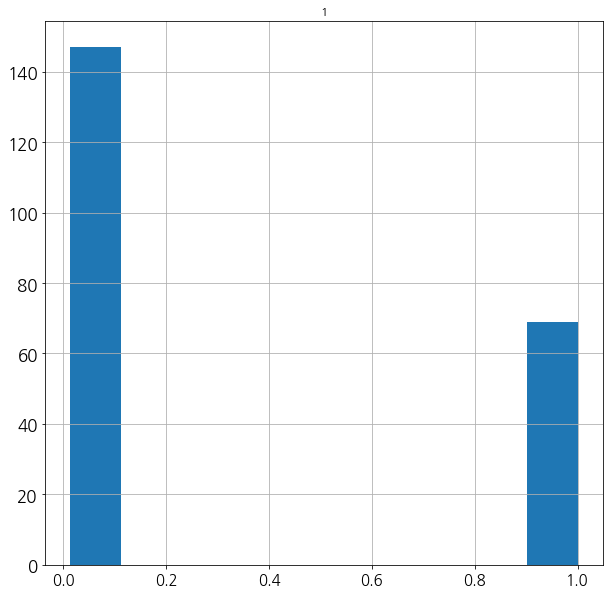

In [663]:
A.hist()

In [ ]:
def draw_col(df, steel_kind, spec, num):
    df = df[df['강종']==steel_kind]
    df= df[df['제품규격'] ==spec]
    
    if len(df) <= num:
        print('규격 :{} 분석에 필요한 데이터 수보다 작습니다.'.format(spec))
        print('제품 총갯수 : {}'.format(len(df)))
    else:
        print('제품 총갯수 : {}'.format(len(df)))
        numeric_cols = df.select_dtypes(exclude = 'object')

        col_sum =len(numeric_cols.columns)

        nrows1= (col_sum // 4) + 1
        n = 0
        m = 0
        print('불량 갯수 : {}'.format(len(numeric_cols[numeric_cols['SCALE']==1])))
        fig, ax = plt.subplots(nrows1 , 4 , figsize = ( 20,15))
        plt.suptitle('강종: {}, 제품규격 : {}'.format(steel_kind, spec))
        fig.subplots_adjust(top=0.95)
        for i in numeric_cols.columns:
            pro = numeric_cols[numeric_cols['SCALE']==1]
            
            no = numeric_cols[numeric_cols['SCALE']==0]

    #         print(n,m)
            ax[n,m].hist(no[i],
                         color = 'blue',
                         label = '양품', 
                         alpha = 0.5)
        
            ax[n,m].hist(pro[i],
                         color = 'red',
                         label = '불량',
                         alpha = 0.5)
            ax[n,m].set_xlabel(i)
            ax[n,m].legend(loc ='upper right')
    
            m+=1 
            if m == 4:
                m = 0
                n +=1
            elif n == nrows1:
                break
def spec_draw(df, steel_kind, num):
    df = df[df['강종']== steel_kind]
    
    for i in df['제품규격'].unique():
        print('강종: {}, 제품규격 : {}'.format(steel_kind, i))
        print()
        draw_col(new_scale, steel_kind, i, num)
        print()